<div style=" background-color: RGB(153, 75, 80);" >
<h1 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">PROJET 6 DATA ANALYST</h1>
<h2 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">Analyse des ventes d'une librairies avec Python</h2>
<h3 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">DELCOURT Jade
</h3>
</div>

# Importation des librairies et chargement de fichiers

### Import des librairies

Utilité globale de chacunes des librairies.

    Pandas pour analyser et manipuler les données,
    Numpy pour manipuler des tableaux et des fonctions mathématiques tableaux,
    Matplotlib pour créer des graphiques à partir des données,
    Searborn semblable à une sur couche de Matplotlib qui apport certain designs.
    Statsmodelspour l'estimation de modèles statistiques, l'exécution de tests statistiques.
    Scipy.stats pearsonr, kstest, spearmanr, bartlett, kruskal, chi2_contingency pour mes différents tests statistique.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import chi2_contingency
from scipy.stats import kstest
from scipy.stats import bartlett
from scipy.stats import pearsonr
from scipy.stats import spearmanr
from scipy.stats import kruskal

### Chargement des fichiers

J'importe les données des fichiers CSV corrigés.

In [2]:
transac = pd.read_csv("Transactions.csv", sep=';')
clients = pd.read_csv("customers.csv", sep=';')
produits = pd.read_csv("products.csv", sep=';')

J'ai fait un teste pour importer les données des fichier non corrigé mais je n'ai pas réussi à réaliser l'import suite à un problème d'encodage. J'ai fait des recherches pour pouvoir identifier l'encodage et le forcé mais même en détectant l'encodage je n'ai pas pu importer les fichiers.

Exemple ci-dessous : 

In [3]:
import chardet

with open("._products.csv", 'rb') as f:
    result = chardet.detect(f.read())
    
print("Encodage détecté :", result['encoding'])


Encodage détecté : ISO-8859-1


In [4]:
test = pd.read_csv("._products.csv", encoding='ISO-8859-1')
print(test.head())  

   Unnamed: 0
0         NaN


# Analyse et exploration des fichiers

Vérification de l'import fichier clients.

In [5]:
clients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8621 entries, 0 to 8620
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   client_id  8621 non-null   object
 1   sex        8621 non-null   object
 2   birth      8621 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 202.2+ KB


Vérification du nombre de valeurs null par colonne.

In [6]:
clients.isnull().sum()

client_id    0
sex          0
birth        0
dtype: int64

Il n'y as pas des valeurs null dans ce DataFrame.

In [7]:
clients

,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943
...,...,...,...
8616,c_7920,m,1956
8617,c_7403,f,1970
8618,c_5119,m,1974
8619,c_5643,f,1968


In [8]:
print("Le tableau comporte", clients.shape[0], "lignes et", clients.shape[1], "colonnes.")

Le tableau comporte 8621 lignes et 3 colonnes.


Je teste l'unicité de ma clef primaire.

In [9]:
if clients['client_id'].nunique() == len(clients['client_id']):
    print("Toutes les valeurs de la série sont uniques.")
else:
    print("Il y a des valeurs répétées dans la série.")

Toutes les valeurs de la série sont uniques.


In [10]:
clients['age'] = (2024 - clients['birth']).astype(object)
clients

,client_id,sex,birth,age
0,c_4410,f,1967,57
1,c_7839,f,1975,49
2,c_1699,f,1984,40
3,c_5961,f,1962,62
4,c_5320,m,1943,81
...,...,...,...,...
8616,c_7920,m,1956,68
8617,c_7403,f,1970,54
8618,c_5119,m,1974,50
8619,c_5643,f,1968,56


In [11]:
print("La personne la plus agée à", clients['age'].max(), "ans, celle de la plus jeune à", clients['age'].min(), "ans.")

La personne la plus agée à 95 ans, celle de la plus jeune à 20 ans.


J'affiche le nombre de variable unique.

In [12]:
clients['sex'].unique()

array(['f', 'm'], dtype=object)

Création de groupe d'âge pour des analyses futur.

Je commence par la création de mes conditions, puis ensuite de mes valeurs correspondantes enfin j'applique mes conditions et créer ma nouvelle série.

In [13]:
Goupes = [
    (clients["age"] < 30),
    (clients["age"] >= 30) & (clients["age"] < 50),
    (clients["age"] >= 50) & (clients["age"] < 70),
    (clients["age"] >= 70)]


Groupes_valeurs = [
    "Moins 30 ans",
    "De 30 à 50",
    "De 50 à 70",
    "Plus 70 ans"]

clients["Groupe d'age"] = np.select(Goupes, Groupes_valeurs, default="autre")

clients.head()

,client_id,sex,birth,age,Groupe d'age
0,c_4410,f,1967,57,De 50 à 70
1,c_7839,f,1975,49,De 30 à 50
2,c_1699,f,1984,40,De 30 à 50
3,c_5961,f,1962,62,De 50 à 70
4,c_5320,m,1943,81,Plus 70 ans


Vérification de l'import fichier produits

In [14]:
produits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3286 entries, 0 to 3285
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id_prod  3286 non-null   object 
 1   price    3286 non-null   float64
 2   categ    3286 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 77.1+ KB


Vérification du nombre de valeurs null par colonne.

In [15]:
produits.isnull().sum()

id_prod    0
price      0
categ      0
dtype: int64

Il n'y as pas des valeurs null dans ce DataFrame.

In [16]:
produits

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0
...,...,...,...
3281,2_23,115.99,2
3282,0_146,17.14,0
3283,0_802,11.22,0
3284,1_140,38.56,1


In [17]:
print("Le tableau comporte", produits.shape[0], "lignes et", produits.shape[1], "colonnes.")

Le tableau comporte 3286 lignes et 3 colonnes.


Je teste l'unicité de ma clef primaire.

In [18]:
if produits['id_prod'].nunique() == len(produits['id_prod']):
    print("Toutes les valeurs de la série sont uniques.")
else:
    print("Il y a des valeurs répétées dans la série.")

Toutes les valeurs de la série sont uniques.


J'affiche le nombre de variable unique.

In [19]:
produits['categ'].unique()

array([0, 1, 2], dtype=int64)

Je mets ma variable catégorie en type object.

In [20]:
produits['categ'] = produits['categ'].astype(object)

In [21]:
print("Le montant maximun est", produits["price"].max(), "et le montant minimum est", produits["price"].min())

Le montant maximun est 300.0 et le montant minimum est 0.62


J'affiche les statistiques descriptives (tendance centrale, dispersion, forme de la distribution) des ma seul donnée numérique du dataframe produits.

In [22]:
produits.describe().round(2)

,price
count,3286.00
mean,21.86
std,29.85
min,0.62
25%,6.99
50%,13.08
75%,22.99
max,300.00


Vérification de l'import fichier transaction

In [23]:
transac.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 687534 entries, 0 to 687533
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id_prod     687534 non-null  object
 1   date        687534 non-null  object
 2   session_id  687534 non-null  object
 3   client_id   687534 non-null  object
dtypes: object(4)
memory usage: 21.0+ MB


Vérification du nombre de valeurs null par colonne.

In [24]:
transac.isnull().sum()

id_prod       0
date          0
session_id    0
client_id     0
dtype: int64

Il n'y as pas des valeurs null dans ce DataFrame.

In [25]:
transac

,id_prod,date,session_id,client_id
0,0_1259,2021-03-01 00:01:07.843138,s_1,c_329
1,0_1390,2021-03-01 00:02:26.047414,s_2,c_664
2,0_1352,2021-03-01 00:02:38.311413,s_3,c_580
3,0_1458,2021-03-01 00:04:54.559692,s_4,c_7912
4,0_1358,2021-03-01 00:05:18.801198,s_5,c_2033
...,...,...,...,...
687529,1_508,2023-02-28 23:49:03.148402,s_348444,c_3573
687530,2_37,2023-02-28 23:51:29.318531,s_348445,c_50
687531,1_695,2023-02-28 23:53:18.929676,s_348446,c_488
687532,0_1547,2023-02-28 23:58:00.107815,s_348447,c_4848


In [26]:
print("Le tableau comporte", transac.shape[0], "lignes et", transac.shape[1], "colonnes.")

Le tableau comporte 687534 lignes et 4 colonnes.


In [27]:
print("La dernière transaction à eu lieu le", transac['date'].max(), "et la permière à eu lieu le" , transac['date'].min())

La dernière transaction à eu lieu le 2023-02-28 23:58:30.792755 et la permière à eu lieu le 2021-03-01 00:01:07.843138


Je retire les secondes, minutes et heures, puis je convertis la série en date.

In [28]:
transac["date"] = transac["date"].apply(lambda x: x[:10])
transac["date"] = pd.to_datetime(transac["date"])

# Jointure 

Je fais ma jointure externe entre le dataframe transaction et clients sur la clef clients_id, puis je fait la joiture avec le dataframe produits sur la clef id_prod toujours en jointure externe. Ce type de jointure me permets de consevé les clients inactifs mais aussi les produits non vendus.

In [29]:
data = pd.merge(transac, clients, on = 'client_id', how = 'outer')
data

,id_prod,date,session_id,client_id,sex,birth,age,Groupe d'age
0,0_1259,2021-03-01,s_1,c_329,f,1967,57,De 50 à 70
1,1_498,2021-03-11,s_4624,c_329,f,1967,57,De 50 à 70
2,0_1140,2021-03-16,s_7071,c_329,f,1967,57,De 50 à 70
3,1_451,2021-03-18,s_8134,c_329,f,1967,57,De 50 à 70
4,1_381,2021-04-25,s_25561,c_329,f,1967,57,De 50 à 70
...,...,...,...,...,...,...,...,...
687550,NaN,NaT,NaN,c_862,f,1956,68,De 50 à 70
687551,NaN,NaT,NaN,c_7584,f,1960,64,De 50 à 70
687552,NaN,NaT,NaN,c_90,m,2001,23,Moins 30 ans
687553,NaN,NaT,NaN,c_587,m,1993,31,De 30 à 50


In [30]:
data = pd.merge(data, produits, on = 'id_prod', how = 'outer')
data

,id_prod,date,session_id,client_id,sex,birth,age,Groupe d'age,price,categ
0,0_1259,2021-03-01,s_1,c_329,f,1967.0,57,De 50 à 70,11.99,0
1,0_1259,2022-10-01,s_275943,c_329,f,1967.0,57,De 50 à 70,11.99,0
2,0_1259,2022-12-01,s_305291,c_329,f,1967.0,57,De 50 à 70,11.99,0
3,0_1259,2023-01-01,s_320153,c_329,f,1967.0,57,De 50 à 70,11.99,0
4,0_1259,2021-03-04,s_1519,c_1609,m,1980.0,44,De 30 à 50,11.99,0
...,...,...,...,...,...,...,...,...,...,...
687571,0_1624,NaT,NaN,NaN,NaN,NaN,NaN,NaN,24.50,0
687572,2_86,NaT,NaN,NaN,NaN,NaN,NaN,NaN,132.36,2
687573,0_299,NaT,NaN,NaN,NaN,NaN,NaN,NaN,22.99,0
687574,0_510,NaT,NaN,NaN,NaN,NaN,NaN,NaN,23.66,0


Vérification de mon dataframe data. 

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 687576 entries, 0 to 687575
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id_prod       687555 non-null  object        
 1   date          687534 non-null  datetime64[ns]
 2   session_id    687534 non-null  object        
 3   client_id     687555 non-null  object        
 4   sex           687555 non-null  object        
 5   birth         687555 non-null  float64       
 6   age           687555 non-null  object        
 7   Groupe d'age  687555 non-null  object        
 8   price         687555 non-null  float64       
 9   categ         687555 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(7)
memory usage: 57.7+ MB


In [32]:
data

,id_prod,date,session_id,client_id,sex,birth,age,Groupe d'age,price,categ
0,0_1259,2021-03-01,s_1,c_329,f,1967.0,57,De 50 à 70,11.99,0
1,0_1259,2022-10-01,s_275943,c_329,f,1967.0,57,De 50 à 70,11.99,0
2,0_1259,2022-12-01,s_305291,c_329,f,1967.0,57,De 50 à 70,11.99,0
3,0_1259,2023-01-01,s_320153,c_329,f,1967.0,57,De 50 à 70,11.99,0
4,0_1259,2021-03-04,s_1519,c_1609,m,1980.0,44,De 30 à 50,11.99,0
...,...,...,...,...,...,...,...,...,...,...
687571,0_1624,NaT,NaN,NaN,NaN,NaN,NaN,NaN,24.50,0
687572,2_86,NaT,NaN,NaN,NaN,NaN,NaN,NaN,132.36,2
687573,0_299,NaT,NaN,NaN,NaN,NaN,NaN,NaN,22.99,0
687574,0_510,NaT,NaN,NaN,NaN,NaN,NaN,NaN,23.66,0


In [33]:
print("Le tableau comporte", data.shape[0], "lignes et", data.shape[1], "colonnes.")

Le tableau comporte 687576 lignes et 10 colonnes.


Vérification du nombre de valeurs null par colonne.

In [34]:
data.isnull().sum()

id_prod         21
date            42
session_id      42
client_id       21
sex             21
birth           21
age             21
Groupe d'age    21
price           21
categ           21
dtype: int64

        Je vois qu'il y a 21 valeurs vides sauf pour la date et les id_session ou il y a 42 valeurs vides.

Je supposes qu'il y a 21 clients incatifs et 21 produits non vendus.

Je filtre sur mes clients inactifs.

In [35]:
clients_inactif = data.loc[data["id_prod"].isnull()]
clients_inactif

,id_prod,date,session_id,client_id,sex,birth,age,Groupe d'age,price,categ
687534,NaN,NaT,NaN,c_8253,f,2001.0,23,Moins 30 ans,NaN,NaN
687535,NaN,NaT,NaN,c_3789,f,1997.0,27,Moins 30 ans,NaN,NaN
687536,NaN,NaT,NaN,c_4406,f,1998.0,26,Moins 30 ans,NaN,NaN
687537,NaN,NaT,NaN,c_2706,f,1967.0,57,De 50 à 70,NaN,NaN
687538,NaN,NaT,NaN,c_3443,m,1959.0,65,De 50 à 70,NaN,NaN
687539,NaN,NaT,NaN,c_4447,m,1956.0,68,De 50 à 70,NaN,NaN
687540,NaN,NaT,NaN,c_3017,f,1992.0,32,De 30 à 50,NaN,NaN
687541,NaN,NaT,NaN,c_4086,f,1992.0,32,De 30 à 50,NaN,NaN
687542,NaN,NaT,NaN,c_6930,m,2004.0,20,Moins 30 ans,NaN,NaN
687543,NaN,NaT,NaN,c_4358,m,1999.0,25,Moins 30 ans,NaN,NaN


Il y a bien 21 clients incatifs.

Je filtre sur mes produits non vendu.

In [36]:
produits_non_vendu = data.loc[data["client_id"].isnull()]
produits_non_vendu

,id_prod,date,session_id,client_id,sex,birth,age,Groupe d'age,price,categ
687555,0_1016,NaT,NaN,NaN,NaN,NaN,NaN,NaN,35.06,0
687556,0_1780,NaT,NaN,NaN,NaN,NaN,NaN,NaN,1.67,0
687557,0_1062,NaT,NaN,NaN,NaN,NaN,NaN,NaN,20.08,0
687558,0_1119,NaT,NaN,NaN,NaN,NaN,NaN,NaN,2.99,0
687559,0_1014,NaT,NaN,NaN,NaN,NaN,NaN,NaN,1.15,0
687560,1_0,NaT,NaN,NaN,NaN,NaN,NaN,NaN,31.82,1
687561,0_1318,NaT,NaN,NaN,NaN,NaN,NaN,NaN,20.92,0
687562,0_1800,NaT,NaN,NaN,NaN,NaN,NaN,NaN,22.05,0
687563,0_1645,NaT,NaN,NaN,NaN,NaN,NaN,NaN,2.99,0
687564,0_322,NaT,NaN,NaN,NaN,NaN,NaN,NaN,2.99,0


Il y a bien 21 produits non vendus.

Pour ne pas fausser mes analyses je vais supprimer ces valeurs null de mon dataframe, car ce qui nous intéresse ce sont nos chiffres de ventes et la population de clients qui sont actifs pour déterminé des tendances ou autres.

In [37]:
data = data.drop(produits_non_vendu.index)
data = data.drop(clients_inactif.index)
data

,id_prod,date,session_id,client_id,sex,birth,age,Groupe d'age,price,categ
0,0_1259,2021-03-01,s_1,c_329,f,1967.0,57,De 50 à 70,11.99,0
1,0_1259,2022-10-01,s_275943,c_329,f,1967.0,57,De 50 à 70,11.99,0
2,0_1259,2022-12-01,s_305291,c_329,f,1967.0,57,De 50 à 70,11.99,0
3,0_1259,2023-01-01,s_320153,c_329,f,1967.0,57,De 50 à 70,11.99,0
4,0_1259,2021-03-04,s_1519,c_1609,m,1980.0,44,De 30 à 50,11.99,0
...,...,...,...,...,...,...,...,...,...,...
687529,2_81,2022-02-19,s_167662,c_7616,m,1993.0,31,De 30 à 50,86.99,2
687530,0_807,2021-07-24,s_66634,c_8273,m,1991.0,33,De 30 à 50,1.99,0
687531,1_408,2021-09-26,s_95708,c_7402,m,1945.0,79,Plus 70 ans,35.24,1
687532,1_408,2022-11-26,s_302962,c_7402,m,1945.0,79,Plus 70 ans,35.24,1


In [38]:
CA = round(data['price'].sum(),2)
print("Chiffre d'affaire total est de ", CA, "€")

Chiffre d'affaire total est de  12027663.1 €


# Demande d'Antoine 

## Les tendances du chiffre d'affaire 

### *Chiffre d'affaire dans le temps*

Pour avoir mon chiffre d'affaire dans le temps je vais grouper mon chiffre d'affaire par date.

In [39]:
CA_evolution = data.groupby(by=['date']).sum().reset_index()
CA_evolution['date'] = pd.to_datetime (CA_evolution['date'])
CA_evolution = CA_evolution.rename(columns={'price':'CA'})
CA_evolution['CA'] = round(CA_evolution['CA'])
CA_evolution = CA_evolution[['date','CA']]
CA_evolution

C:\Users\dltja\AppData\Local\Temp\ipykernel_20612\437314975.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  CA_evolution = data.groupby(by=['date']).sum().reset_index()


,date,CA
0,2021-03-01,16565.0
1,2021-03-02,15486.0
2,2021-03-03,15199.0
3,2021-03-04,15196.0
4,2021-03-05,17471.0
...,...,...
725,2023-02-24,15208.0
726,2023-02-25,15761.0
727,2023-02-26,16305.0
728,2023-02-27,19171.0


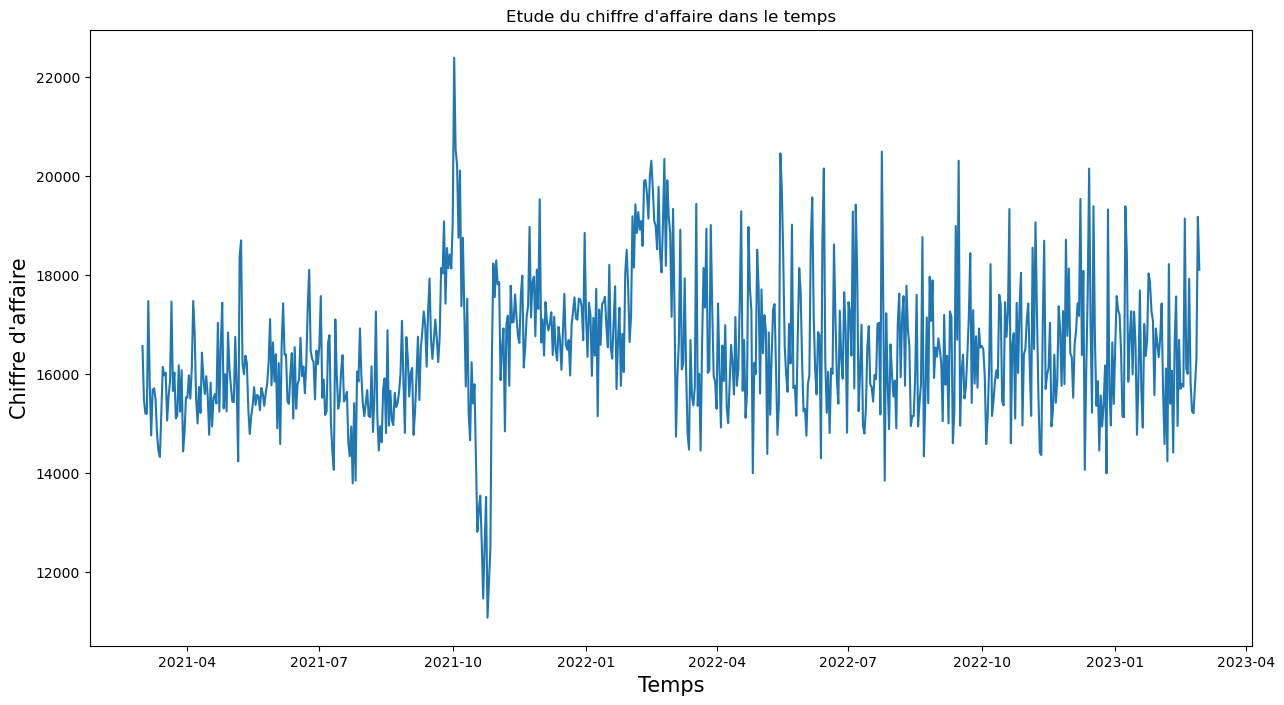

In [40]:
plt.figure(figsize = (15, 8))

plt.plot(CA_evolution["date"], CA_evolution['CA'])

plt.xlabel("Temps", fontsize= 15)
plt.ylabel("Chiffre d'affaire", fontsize= 15)

plt.title("Etude du chiffre d'affaire dans le temps")

plt.show()

J'affiche graphiquement mes données pour une meilleure lisibilité. On remarque qu'il y a eu une hausse du chiffre d'affaires fin septembre 2021, suivie d'une grande baisse de celui-ci d'octobre à novembre 2021. Ces deux périodes ont respectivement atteint le chiffre d'affaires le plus haut (plus de 22 000 euros) et le chiffre d'affaires le plus bas (moins de 12 000 euros) de la librairie. En février et mars 2022, il y a eu une hausse du chiffre d'affaires, qui a augmenté et est resté stable pendant cette période. Pour le reste des périodes, le chiffre d'affaires varie énormément, oscillant entre 20 000 € et 14 000 €.

In [41]:
CA_mean_mobile = CA_evolution.reset_index()
CA_mean_mobile['CA'] = CA_mean_mobile['CA'].rolling(180).mean()

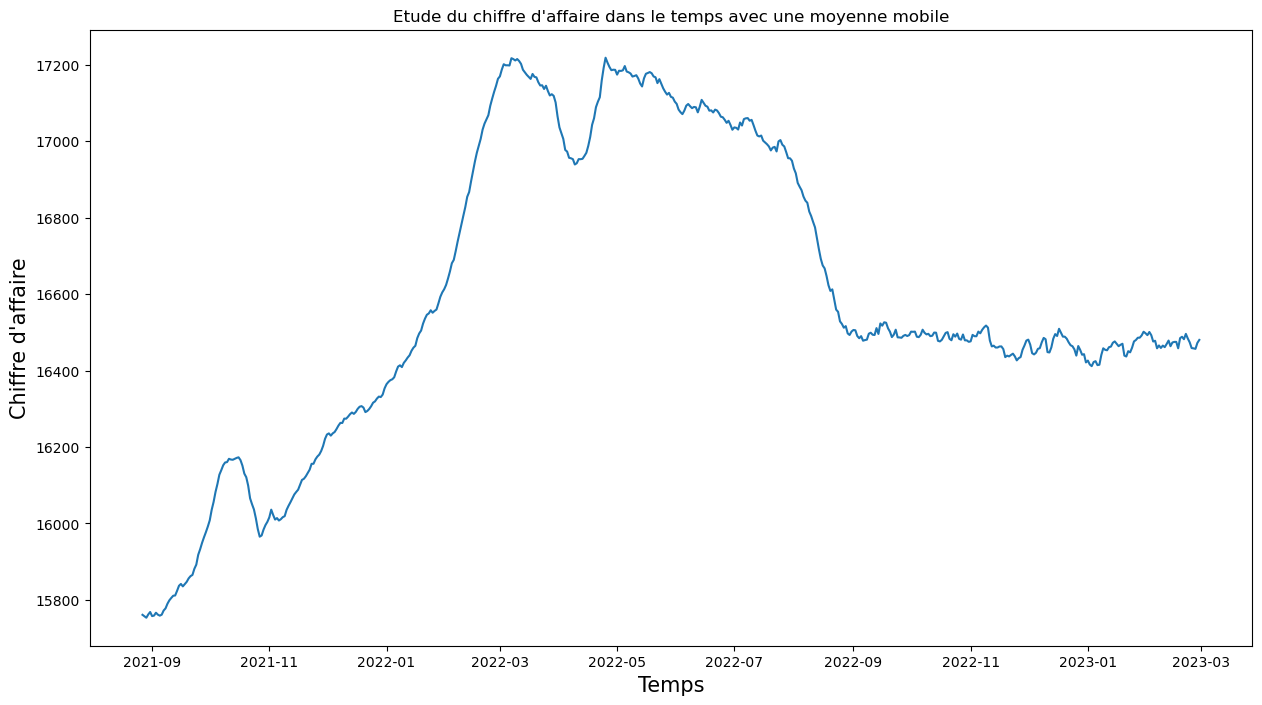

In [42]:
plt.figure(figsize = (15, 8))

plt.plot(CA_mean_mobile["date"], CA_mean_mobile['CA'])

plt.xlabel("Temps", fontsize= 15)
plt.ylabel("Chiffre d'affaire", fontsize= 15)

plt.title("Etude du chiffre d'affaire dans le temps avec une moyenne mobile")

plt.show()

La moyenne mobile nous indique que le chiffre d'affaires était en croissance du 4ᵉ trimestre 2021 à la fin du 1ᵉʳ trimestre 2022, avec une correction en octobre 2021. Ensuite, il a légèrement stagné avec une nouvelle correction après avril 2022. Puis, il a entamé une légère baisse de mai à juillet 2022 et a décru en août 2022, pour enfin stagner fin 2022 et début 2023.

### *Chiffre d'affaire par mois et par an*

Pour comparer le chiffre d'affaire entre les différentes années, je vais grouper le chiffre d'affaire par an puis le détailler par mois dans chacune des années. 

In [43]:
CA_evolution_an = CA_evolution
CA_evolution_an['year'] = CA_evolution_an['date'].dt.year
CA_evolution_an['month'] = CA_evolution_an['date'].dt.month
CA_evolution_an = CA_evolution_an.groupby(by=['year','month']).sum()
CA_evolution_an = CA_evolution_an.unstack('year').reset_index()
CA_evolution_an

C:\Users\dltja\AppData\Local\Temp\ipykernel_20612\1826119318.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  CA_evolution_an = CA_evolution_an.groupby(by=['year','month']).sum()


month        CA                    
year            2021      2022      2023
0        1       NaN  525340.0  517540.0
1        2       NaN  535571.0  456681.0
2        3  482442.0  515458.0       NaN
3        4  476109.0  493001.0       NaN
4        5  492945.0  517134.0       NaN
5        6  484090.0  496020.0       NaN
6        7  482835.0  510784.0       NaN
7        8  482287.0  506466.0       NaN
8        9  507241.0  494116.0       NaN
9       10  494731.0  507918.0       NaN
10      11  516166.0  496666.0       NaN
11      12  525916.0  510221.0       NaN

On constate : 
- Pour 2021 : il manque les deux permiers mois.
- Pour 2022 : l'année est complète.
- Pour 2023 : nous avons que les deux permiers mois.

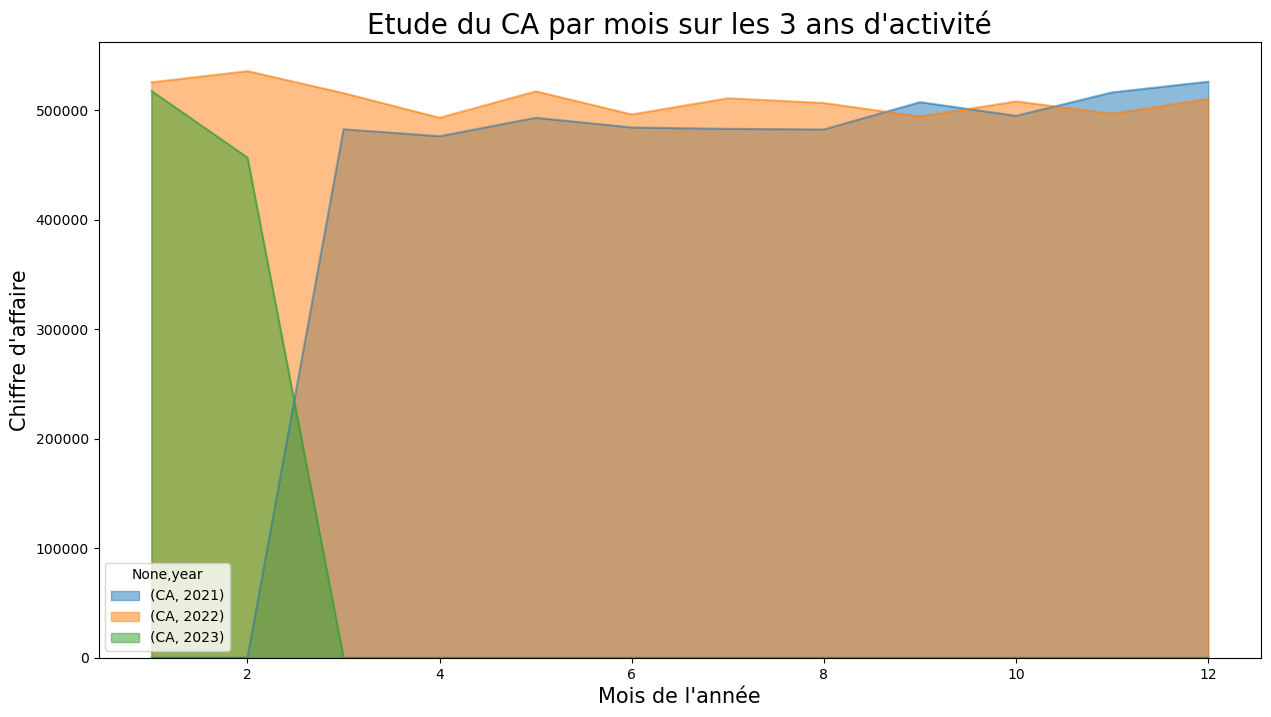

In [44]:
CA_evolution_an.plot.area(x = 'month',stacked=False ,figsize=(15, 8))
plt.title("Etude du CA par mois sur les 3 ans d'activité", size = 20)
plt.xlabel("Mois de l'année", size = 15)
plt.ylabel("Chiffre d'affaire", size = 15)
plt.show()

- Pour 2021 : Le chiffre d'affaire est globalement en hausse et reste proche des 50 000 € de chiffre d'affaire par mois.
- Pour 2022 : Le chiffre d'affaire est globalement en baisse mais reste proche des 50 000 € de chiffre d'affaire par mois.
- Pour 2023 : Le chiifre d'affaire est en baisse avec une importante baisse en Février. 

Entre 2022 et 2021 : 2022 semble être une meilleure année.

Je vais réaliser la moyenne du chiffre d'affaire par mois pour chacune des années.

In [45]:
CA_moyen_mois = CA_evolution
CA_moyen_mois['year'] = pd.DatetimeIndex(CA_moyen_mois['date']).year
CA_moyen_mois['month'] = pd.DatetimeIndex(CA_moyen_mois['date']).month
CA_moyen_mois = CA_moyen_mois.groupby(by=['year','month']).sum().reset_index()
CA_moyen_mois = round(CA_moyen_mois.groupby(by=['year']).mean().reset_index())
CA_moyen_mois

C:\Users\dltja\AppData\Local\Temp\ipykernel_20612\3863534904.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  CA_moyen_mois = CA_moyen_mois.groupby(by=['year','month']).sum().reset_index()


,year,month,CA
0,2021,8.0,494476.0
1,2022,6.0,509058.0
2,2023,2.0,487110.0


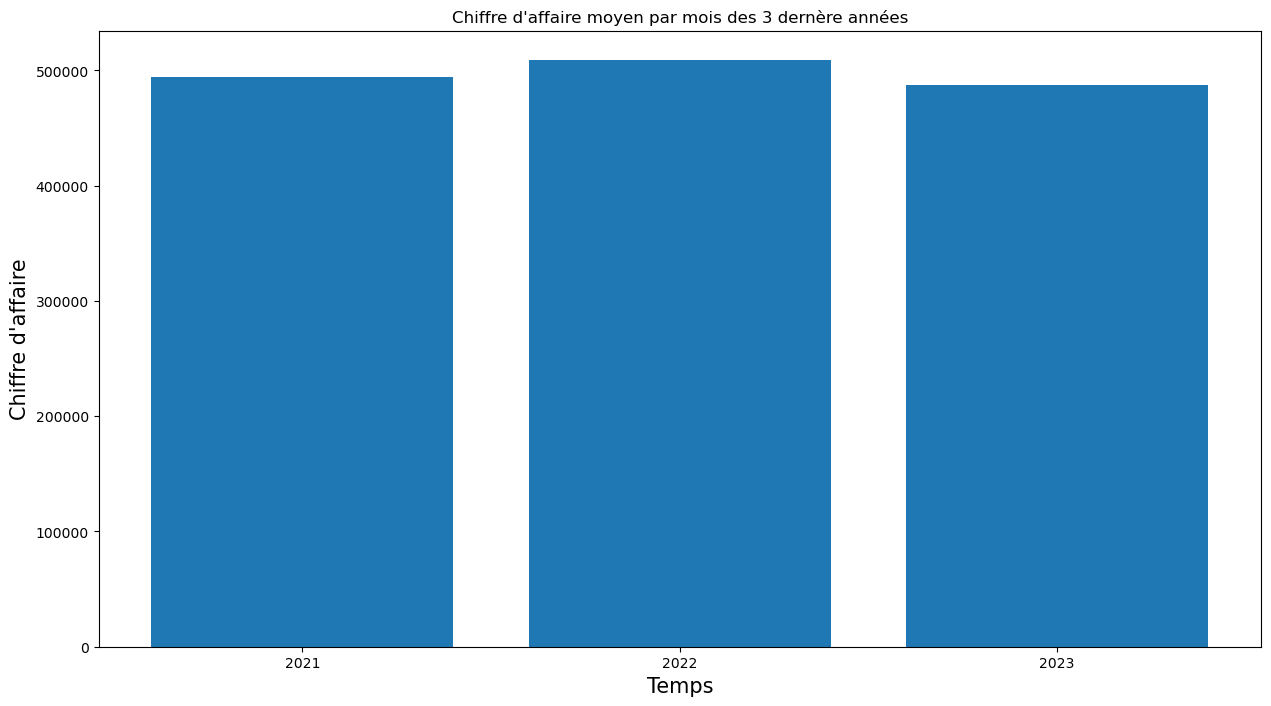

In [46]:
plt.figure(figsize = (15, 8))

plt.bar(CA_moyen_mois["year"], CA_moyen_mois['CA'])

plt.xlabel("Temps", fontsize= 15)
plt.ylabel("Chiffre d'affaire", fontsize= 15)

plt.title("Chiffre d'affaire moyen par mois des 3 dernère années")

plt.xticks([2021, 2022, 2023])

plt.show()

Les trois années ont un chiffre d'affaire moyen par mois proche. On peux tout de même voir un léger détachement de l'année 2022 qui a un chiffre plus élevé.

### *Chiffre d'affaire par an*

In [47]:
CA_an = CA_evolution
CA_an['year'] = CA_an['date'].dt.year
CA_an['month'] = CA_an['date'].dt.month
CA_an = CA_an.groupby(by = ["year"]).sum().reset_index()
pd.set_option('display.float_format', lambda x: '%.2f' % x)
CA_an

C:\Users\dltja\AppData\Local\Temp\ipykernel_20612\1981230088.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  CA_an = CA_an.groupby(by = ["year"]).sum().reset_index()


,year,CA,month
0,2021,4944762.00,2295
1,2022,6108695.00,2382
2,2023,974221.00,87


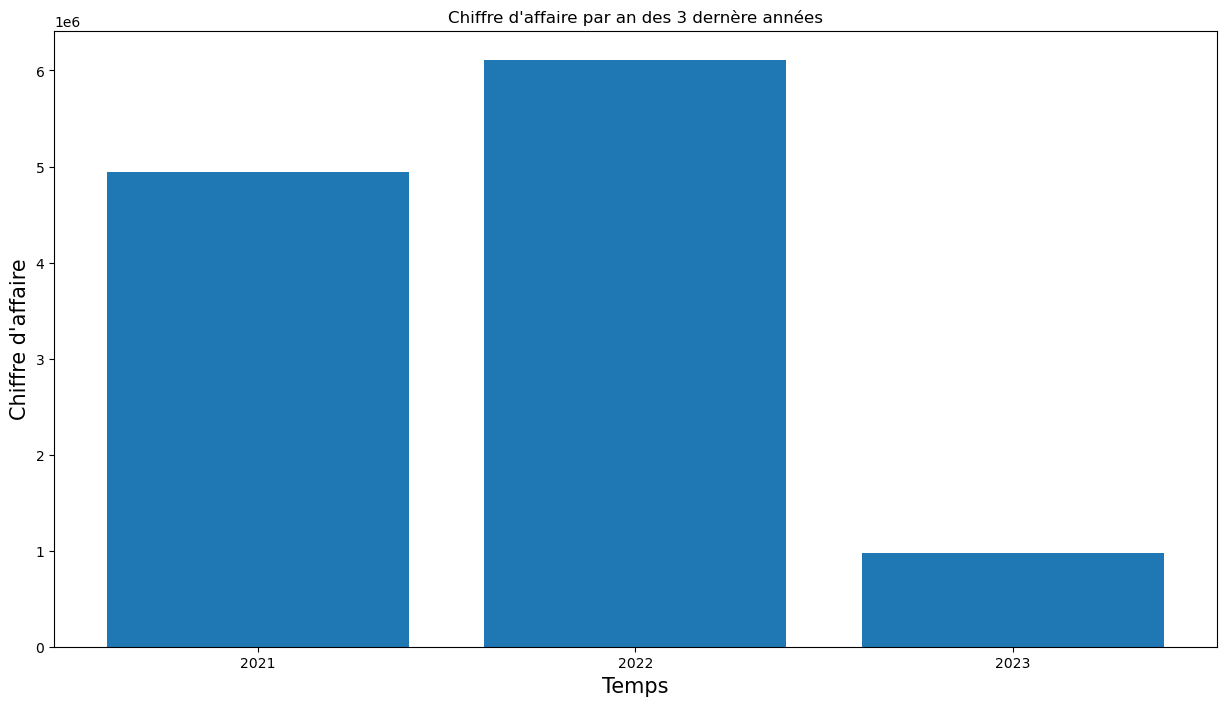

In [48]:
plt.figure(figsize = (15, 8))

plt.bar(CA_an["year"], CA_an['CA'])

plt.xlabel("Temps", fontsize= 15)
plt.ylabel("Chiffre d'affaire", fontsize= 15)

plt.title("Chiffre d'affaire par an des 3 dernère années")

plt.xticks([2021, 2022, 2023])

plt.show()

- Pour 2021 : On frolle les 5 millons de chiffre d'affaire annuelle.
- Pour 2022 : On réalise une hausse du chiffre d'affaire annuelle en atteignant les 6 millons.
- Pour 2023 : On ne peut pas prendre les données en compte au vue du nombre de donnée manquantes.

### *Chiffre d'affaire par catégorie produit*

Pour aller plus dans le détail, je vais analyser le chiffre d'affaire par catégories.

In [49]:
CA_catego = data.groupby(by=["categ"]).sum()
CA_catego = CA_catego.rename(columns = {"price" : "CA"})
CA_catego = CA_catego[["CA"]]
CA_catego

C:\Users\dltja\AppData\Local\Temp\ipykernel_20612\2170143000.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  CA_catego = data.groupby(by=["categ"]).sum()


,CA
categ,
0,4419730.97
1,4827657.11
2,2780275.02


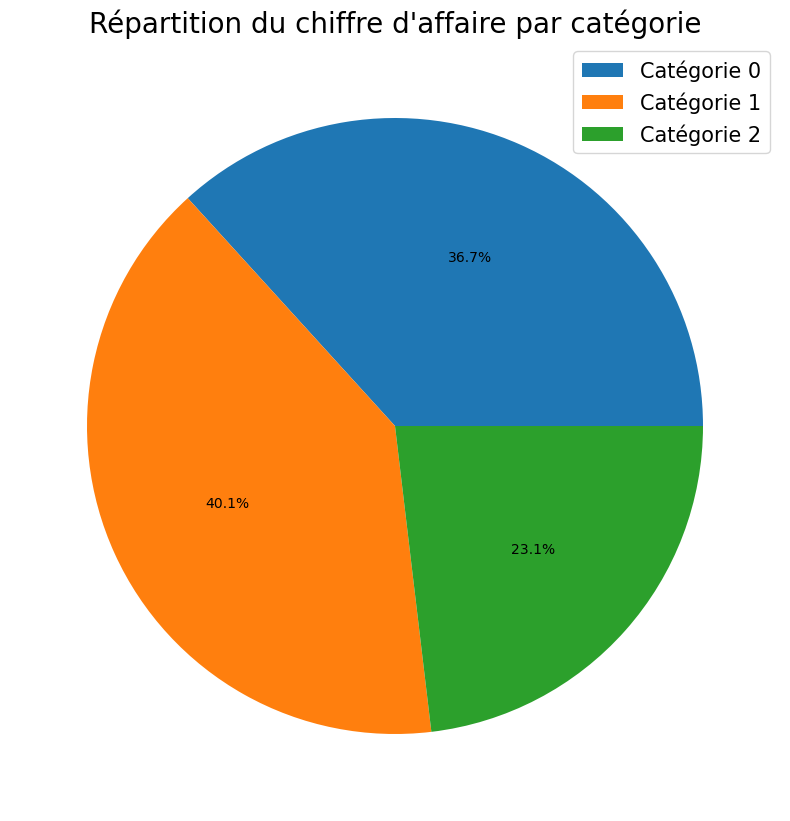

In [50]:
plt.figure(figsize=(10, 10))

plt.pie(CA_catego["CA"],  autopct = "%1.1f%%")

plt.title("Répartition du chiffre d'affaire par catégorie", size = 20)

plt.legend(['Catégorie 0','Catégorie 1','Catégorie 2'], fontsize = 15)

plt.show()

La catégorie 1, avec 40 % du chiffre d'affaire suivie de peut par la catégorie 0 à 37 %, la dernière catégorie étant la 2.

### *Chiffre d'affaire par genre*

In [51]:
CA_genre = data.groupby(by=["sex"]).sum()
CA_genre = CA_genre.rename(columns = {"price" : "CA"})
CA_genre = CA_genre[["CA"]]
CA_genre

C:\Users\dltja\AppData\Local\Temp\ipykernel_20612\3042353207.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  CA_genre = data.groupby(by=["sex"]).sum()


,CA
sex,
f,5950843.68
m,6076819.42


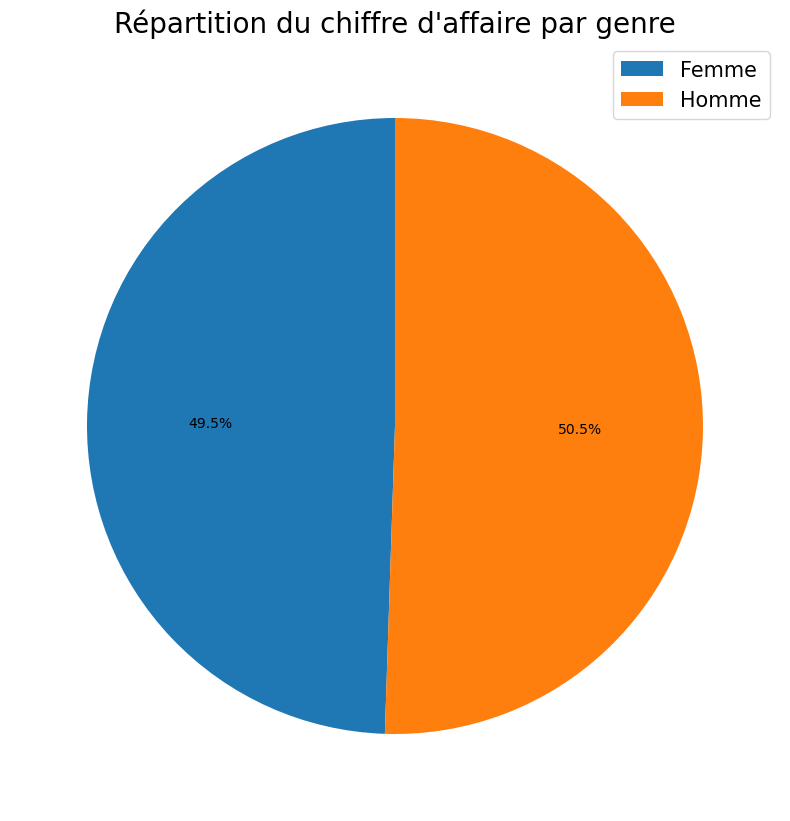

In [52]:
plt.figure(figsize=(10, 10))

plt.pie(CA_genre["CA"],  autopct = "%1.1f%%", startangle=90)

plt.title("Répartition du chiffre d'affaire par genre", size = 20)

plt.legend(["Femme", "Homme"], fontsize = 15)

plt.show()

La répartion du chiffre d'affaire entre le genre des clients est égalitaire.

### *Répartition du chiffre d'affaire*

Maintenant je vais prendre le chiffre d'affaire par clients.

In [53]:
CA_Client = data.groupby('client_id').sum()
CA_Client = CA_Client.rename(columns={'price':'CA'})
CA_Client = CA_Client['CA'].reset_index()
CA_Client = CA_Client.sort_values(by=["CA"], ascending=False)
CA_Client.head(10)

C:\Users\dltja\AppData\Local\Temp\ipykernel_20612\754300293.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  CA_Client = data.groupby('client_id').sum()


,client_id,CA
677,c_1609,326039.89
4388,c_4958,290227.03
6337,c_6714,153918.60
2724,c_3454,114110.57
634,c_1570,5285.82
2513,c_3263,5276.87
1268,c_2140,5260.18
2108,c_2899,5214.05
7006,c_7319,5155.77
7715,c_7959,5135.75


Certains clients ont un chiffre d'affaire générer très élevé. 

On considèras ces clients comme des professionnel.

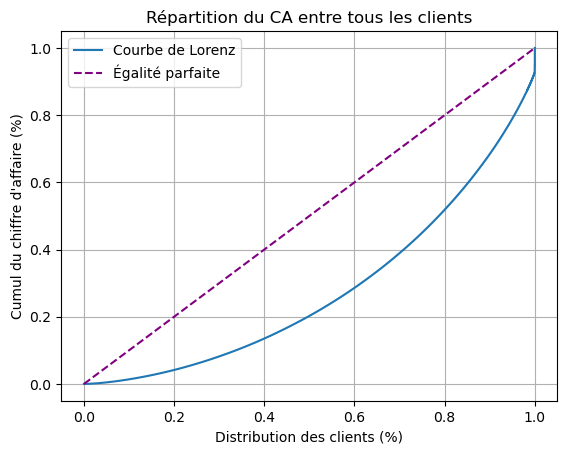

In [54]:
n = len(CA_Client["CA"])
lorenz = np.cumsum(np.sort(CA_Client["CA"])) / CA_Client["CA"].sum()
lorenz = np.append([0], lorenz)  # La courbe de Lorenz commence à 0

xaxis = np.linspace(0, 1, n+1)  # Correcting the x-axis calculation
plt.plot(xaxis, lorenz, drawstyle='steps-post', label="Courbe de Lorenz")

plt.plot([0, 1], [0, 1], color='purple', linestyle='--', label="Égalité parfaite")

plt.grid()
plt.xlabel("Distribution des clients (%)")
plt.ylabel("Cumul du chiffre d'affaire (%)")
plt.title("Répartition du CA entre tous les clients")
plt.legend()
plt.show()

In [55]:
AUC = (lorenz.sum() -lorenz[-1]/2 -lorenz[0]/2)/n # Surface sous la courbe de Lorenz. Le premier segment (lorenz[0]) est à moitié en dessous de 0, on le coupe donc en 2, on fait de même pour le dernier segment lorenz[-1] qui est à moitié au dessus de 1.
S = 0.5 - AUC # surface entre la première bissectrice et le courbe de Lorenz
gini = 2*S
gini = round(gini, 2)
print("L'indice de Gini est de :", gini)

L'indice de Gini est de : 0.44


20 % des clients génèrent plus de 50 % du chiffre d'affaires de la librairie. 

La répartition du chiffre d'affaires n'est pas égalitaire car elle ne suit pas la ligne d'égalité parfaite. 
On voit également que la fin de la courbe est une barre verticale représentant nos clients professionnels.

### *Chiffre d'affaire par produits*

In [56]:
CA_produits = data.groupby(by=["id_prod"]).sum().reset_index()
CA_produits = CA_produits.rename(columns = {"price" : "CA"})
CA_produits = CA_produits[['id_prod','CA']]
CA_produits

C:\Users\dltja\AppData\Local\Temp\ipykernel_20612\2092350059.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  CA_produits = data.groupby(by=["id_prod"]).sum().reset_index()


,id_prod,CA
0,0_0,4657.50
1,0_1,5352.13
2,0_10,394.90
3,0_100,61.80
4,0_1000,2954.88
...,...,...
3260,2_95,395.96
3261,2_96,28650.18
3262,2_97,2092.87
3263,2_98,149.74


### *Nombre de ventes par produits*

In [57]:
Nb_vente_prod = data.groupby(by=['id_prod']).count().reset_index()
Nb_vente_prod = Nb_vente_prod.rename(columns={'price':'NbVendu'})
Nb_vente_prod = Nb_vente_prod[['id_prod','NbVendu']]
Nb_vente_prod

,id_prod,NbVendu
0,0_0,1242
1,0_1,487
2,0_10,22
3,0_100,3
4,0_1000,432
...,...,...
3260,2_95,4
3261,2_96,598
3262,2_97,13
3263,2_98,1


### *Top 10 des produits :*

### *Avec les chiffre d'affaire les plus gros*

In [58]:
Top_10 = CA_produits.sort_values("CA", ascending = False).head(10)
Top_10

,id_prod,CA
3096,2_159,94893.50
3070,2_135,69334.95
3045,2_112,65407.76
3034,2_102,60736.78
3152,2_209,56971.86
2619,1_395,56617.47
2591,1_369,56136.60
3043,2_110,53846.25
2607,1_383,53834.43
2641,1_414,53522.18


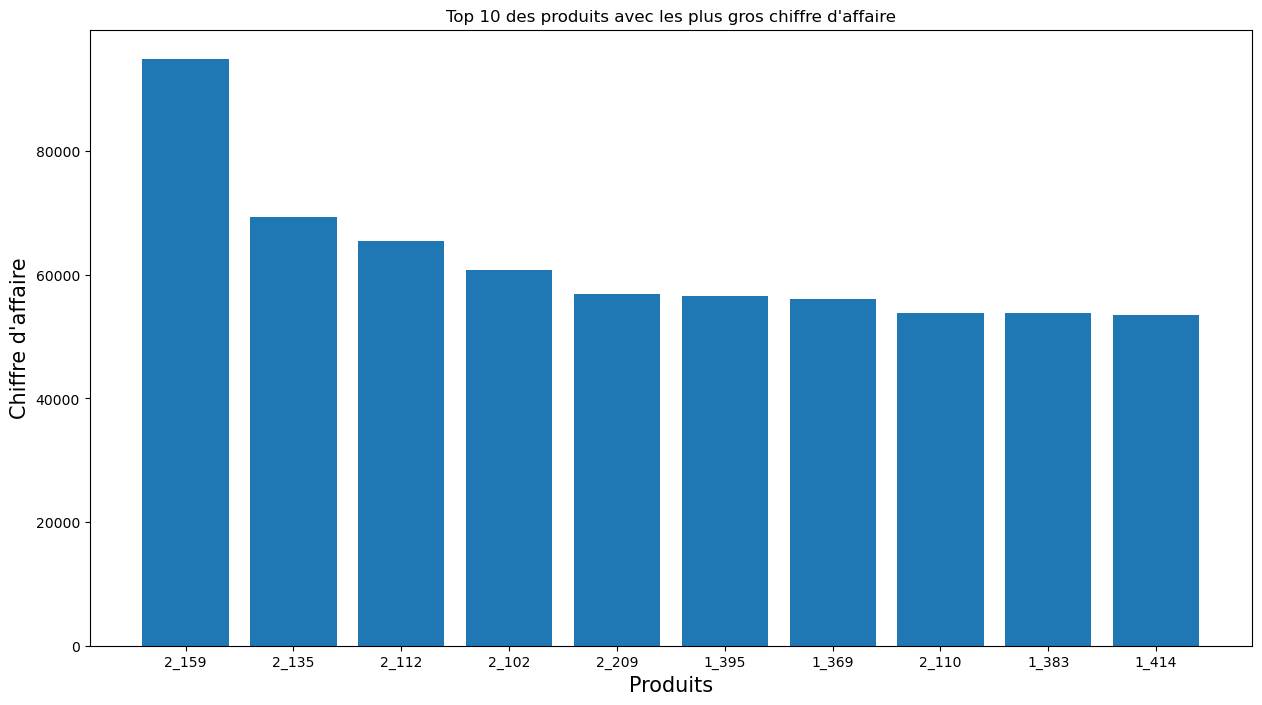

In [59]:
plt.figure(figsize = (15, 8))

plt.bar(Top_10["id_prod"], Top_10['CA'])

plt.xlabel("Produits", fontsize= 15)
plt.ylabel("Chiffre d'affaire", fontsize= 15)

plt.title("Top 10 des produits avec les plus gros chiffre d'affaire")

plt.show()

Le produit 2_159 le best-seller avec un chiffre d'affaire proche de 100 000 €.

### *Avec le plus de vente* 

In [60]:
Top_10_Nb_vente = Nb_vente_prod.sort_values("NbVendu", ascending = False).head(10)
Top_10_Nb_vente

,id_prod,NbVendu
2591,1_369,2340
2644,1_417,2269
2641,1_414,2246
2733,1_498,2202
2653,1_425,2163
2629,1_403,2040
2640,1_413,2036
2639,1_412,2014
2632,1_406,2003
2633,1_407,2001


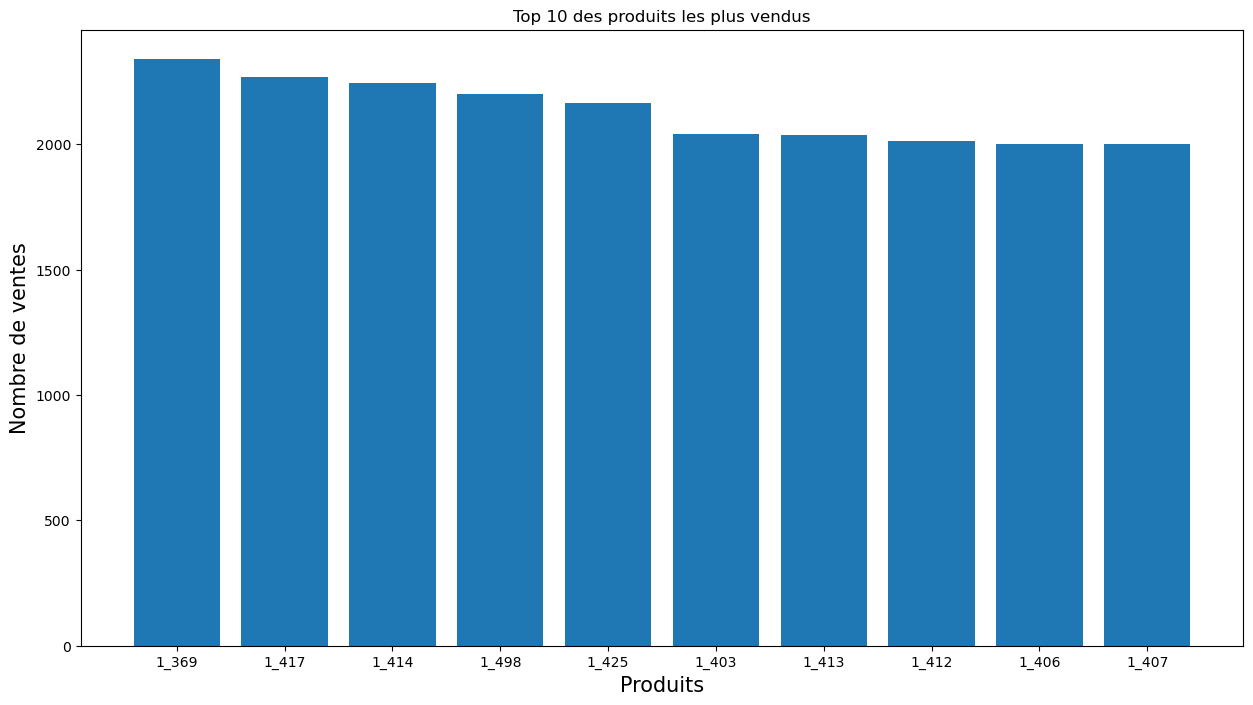

In [61]:
plt.figure(figsize = (15, 8))

plt.bar(Top_10_Nb_vente["id_prod"], Top_10_Nb_vente['NbVendu'])

plt.xlabel("Produits", fontsize= 15)
plt.ylabel("Nombre de ventes", fontsize= 15)

plt.title("Top 10 des produits les plus vendus")

plt.show()

### *Avec les chiffre d'affaire les plus petit*

In [62]:
Flop_10 = CA_produits.sort_values("CA", ascending = True).head(10)
Flop_10

,id_prod,CA
595,0_1539,0.99
313,0_1284,1.38
719,0_1653,1.98
1784,0_541,1.99
665,0_1601,1.99
2079,0_807,1.99
802,0_1728,2.27
549,0_1498,2.48
2179,0_898,2.54
925,0_1840,2.56


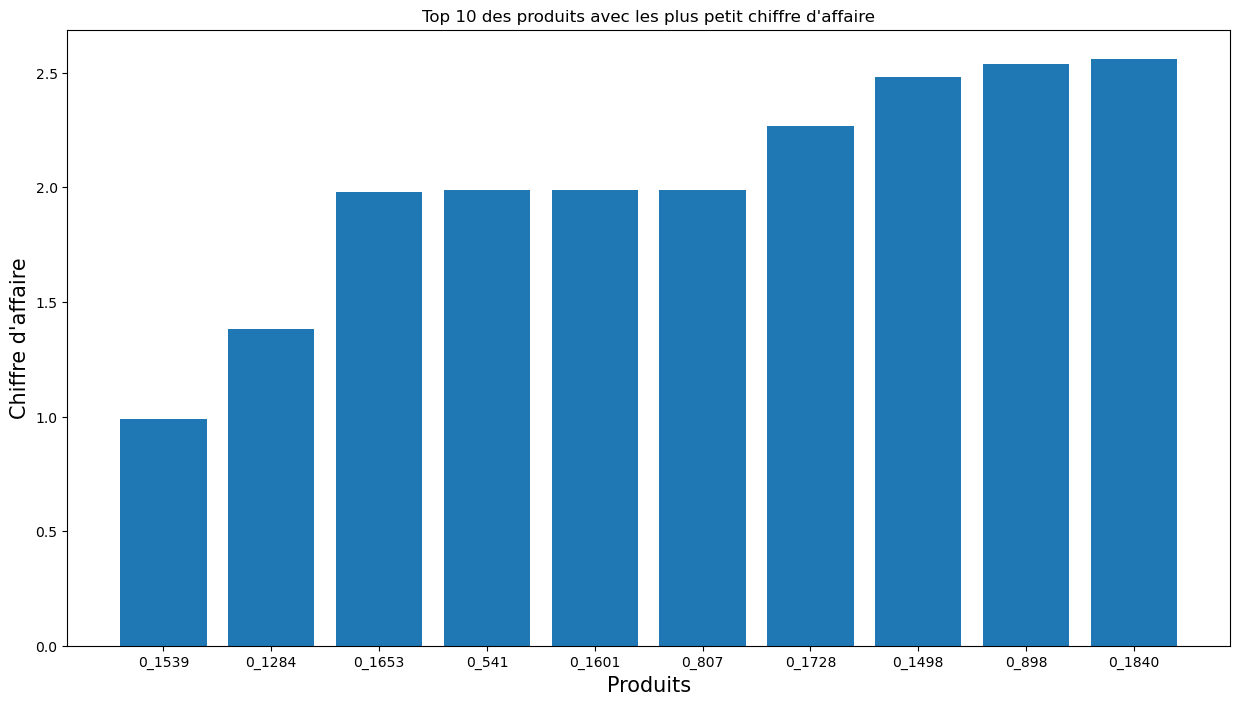

In [63]:
plt.figure(figsize = (15, 8))

plt.bar(Flop_10["id_prod"], Flop_10['CA'])

plt.xlabel("Produits", fontsize= 15)
plt.ylabel("Chiffre d'affaire", fontsize= 15)

plt.title("Top 10 des produits avec les plus petit chiffre d'affaire")

plt.show()

### *Avec moins de 10 de vente* 

In [64]:
Flop_10_Nb_vente = Nb_vente_prod[Nb_vente_prod['NbVendu']< 10]
Flop_10_Nb_vente

,id_prod,NbVendu
3,0_100,3
9,0_1005,5
10,0_1006,8
17,0_1012,3
22,0_1019,8
...,...,...
3258,2_93,2
3259,2_94,8
3260,2_95,4
3263,2_98,1


459 produits ont un nombre de vente inférieur à 10 ventes.

### *Prix moyen par catégorie*

In [65]:
Prix_moyen_catego = data.groupby(by=['categ']).mean().reset_index()
Prix_moyen_catego = Prix_moyen_catego.rename(columns={'price':'Prix Moyen'})
Prix_moyen_catego = Prix_moyen_catego[['categ','Prix Moyen']]
Prix_moyen_catego

C:\Users\dltja\AppData\Local\Temp\ipykernel_20612\2627812217.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Prix_moyen_catego = data.groupby(by=['categ']).mean().reset_index()


,categ,Prix Moyen
0,0,10.64
1,1,20.49
2,2,76.21


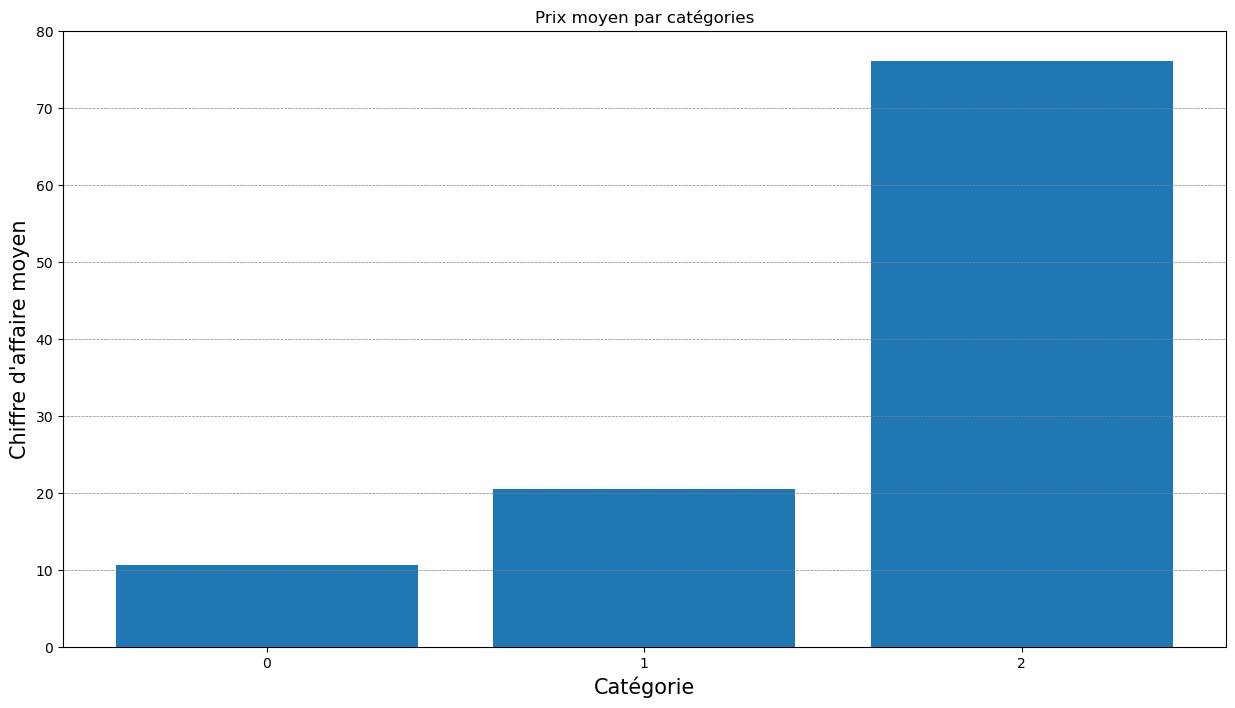

In [66]:
plt.figure(figsize = (15, 8))

plt.bar(Prix_moyen_catego["categ"], Prix_moyen_catego['Prix Moyen'])


plt.xlabel("Catégorie", fontsize= 15)
plt.ylabel("Chiffre d'affaire moyen", fontsize= 15)

plt.title("Prix moyen par catégories")

plt.xticks([0, 1, 2])

plt.grid(True, which='both', axis='y', linestyle='--', linewidth=0.5, color='gray')

plt.show()

Le prix moyen par catégorie est de : 
- 11 € pour la catégorie 0
- 20 € pour la catégorie 1
- 76 € pour la catégorie 2

### *Nombre total de produits différents vendu*

In [67]:
Nb_prod_vendu = data['id_prod'].nunique()
print("Durant la période étudier", Nb_prod_vendu,"produits différent ont été vendu !")

Durant la période étudier 3265 produits différent ont été vendu !


### *Répartition du nombre de produit vendu par catégorie*

In [68]:
Nb_prod_vendu_categ = data.groupby('categ')['id_prod'].nunique()
Nb_prod_vendu_categ

categ
0    2292
1     737
2     236
Name: id_prod, dtype: int64

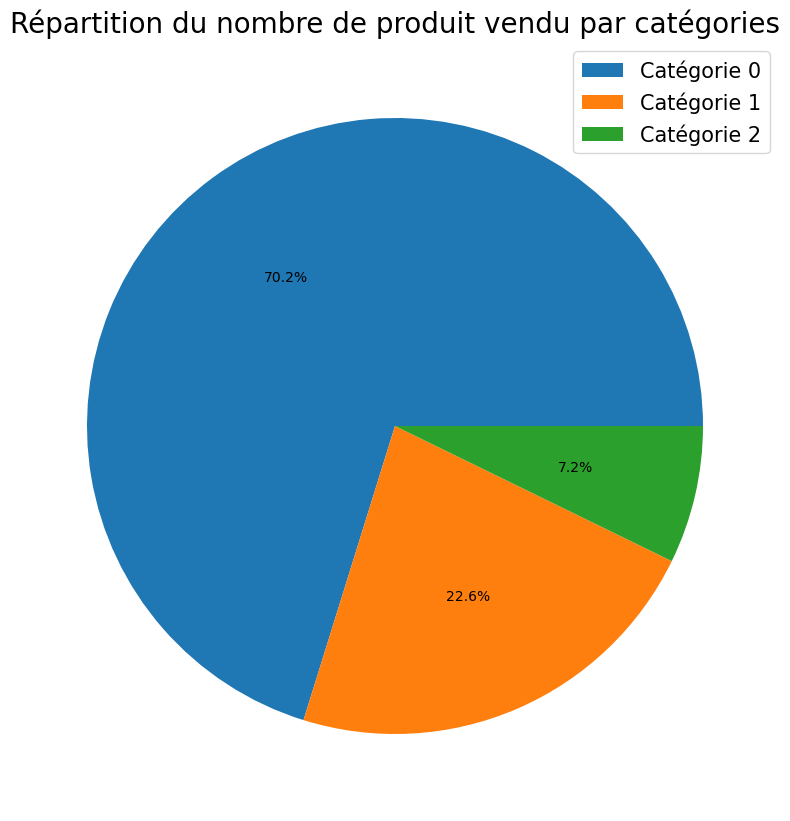

In [69]:
plt.figure(figsize=(10, 10))

plt.pie(Nb_prod_vendu_categ,  autopct = "%1.1f%%")

plt.title("Répartition du nombre de produit vendu par catégories", size = 20)

plt.legend(['Catégorie 0','Catégorie 1','Catégorie 2'], fontsize = 15)

plt.show()

- La catégorie 0 fait le plus de 70 % ventes.
- La catégorie 1 est proche de 25 %. 
- La catégorie 2 est fait moins de 10 %.

En comparant le nombre de vente par cathégorie et le prix moyen de celle-ci, on constate que plus le prix moyen est bas plus il y a de produits vendu.

## Les tendances par profit clients

### *Moyenne d'âge par catégorie* 

In [70]:
moyenne_age_catego = data.groupby('categ')["age"].mean().reset_index()
moyenne_age_catego = moyenne_age_catego.rename(columns= {"age" : "Age moyen"})
moyenne_age_catego = round(moyenne_age_catego)
moyenne_age_catego

,categ,Age moyen
0,0,46.00
1,1,50.00
2,2,28.00


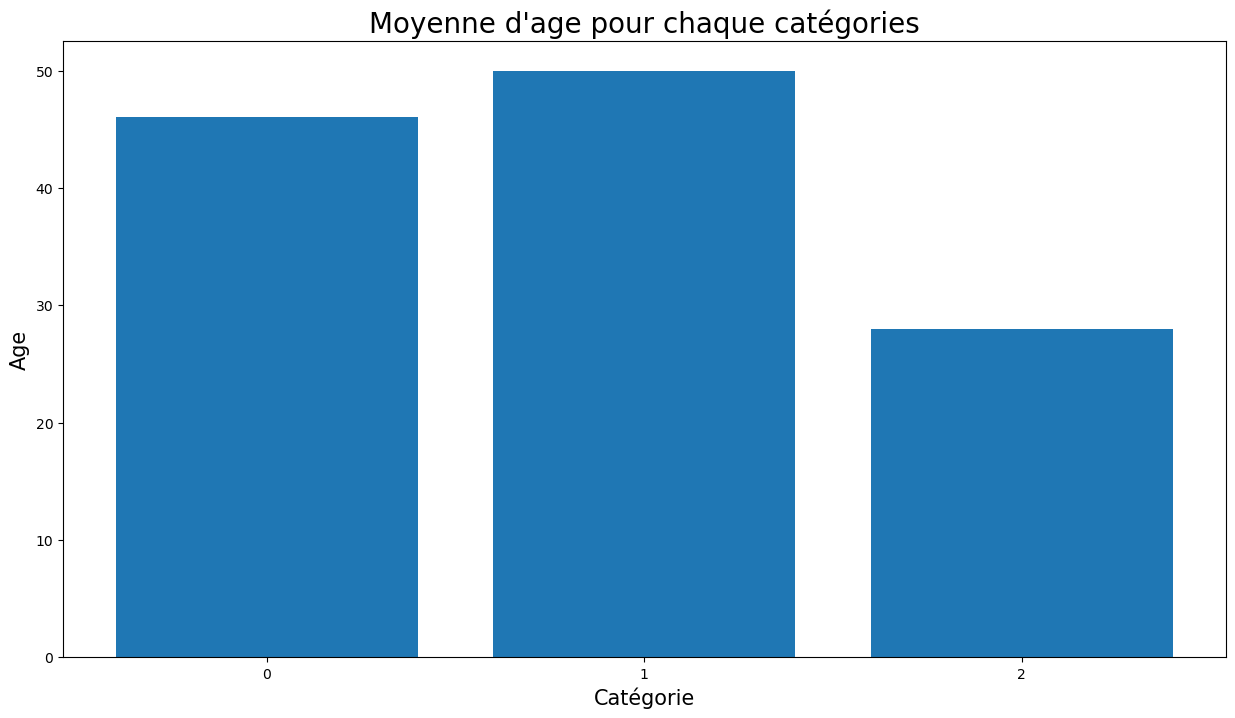

In [71]:
plt.figure(figsize = (15, 8))

plt.bar(moyenne_age_catego["categ"], moyenne_age_catego['Age moyen'])

plt.title("Moyenne d'age pour chaque catégories", size= 20)
plt.ylabel("Age", size= 15)
plt.xlabel("Catégorie", size= 15)

plt.xticks([0, 1, 2])

plt.show()

- La catégorie 0 à une moyenne d'âge de : 46 ans 
- La catégorie 1 à une moyenne d'âge de : 50 ans 
- La catégorie 2 à une moyenne d'âge de : 28 ans 

On remarque que ma moyenne d'âge de la catégorie 2 est la plus basse, donc on peux supposer qu'elle est dédier à un publique assez jeune.


### *CA par classe d'age* 

In [72]:
CA_age = data.groupby(by='age').sum().reset_index()
CA_age = CA_age.rename(columns={'price':'CA'})
CA_age = CA_age[['age', 'CA']]
CA_age

C:\Users\dltja\AppData\Local\Temp\ipykernel_20612\3868021964.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  CA_age = data.groupby(by='age').sum().reset_index()


,age,CA
0,20,616418.15
1,21,180680.89
2,22,186791.83
3,23,181233.57
4,24,167388.08
...,...,...
71,91,5477.83
72,92,5059.18
73,93,2815.45
74,94,4251.22


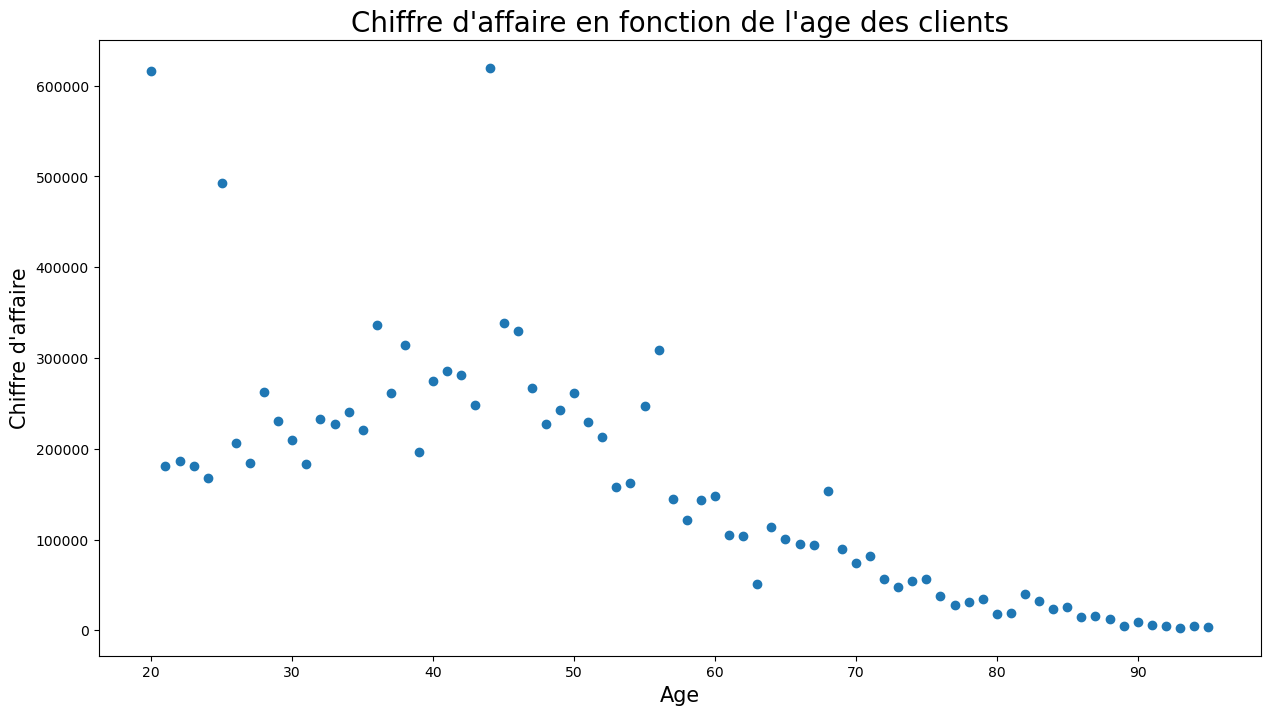

In [73]:
plt.figure(figsize = (15, 8))
plt.scatter(CA_age['age'], CA_age['CA'])
plt.title("Chiffre d'affaire en fonction de l'age des clients", size=20)
plt.xlabel("Age", size= 15)
plt.ylabel("Chiffre d'affaire", size= 15)
plt.show()

- Le chiffre d'affaire augment entre 20 et 45 ans 
- Le chiffre d'affaire diminue à partir de 45 ans

### *Montant du panier moyen par age* 

In [74]:
CA_panier_age = data.groupby(['age', 'session_id']).sum().reset_index()
CA_panier_age = CA_panier_age.groupby(['age']).mean().reset_index()
CA_panier_age = CA_panier_age.rename(columns = {"price" : "Prix du panier moyen"})
CA_panier_age = CA_panier_age[['age', 'Prix du panier moyen']]
CA_panier_age

C:\Users\dltja\AppData\Local\Temp\ipykernel_20612\1027249403.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  CA_panier_age = data.groupby(['age', 'session_id']).sum().reset_index()
C:\Users\dltja\AppData\Local\Temp\ipykernel_20612\1027249403.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  CA_panier_age = CA_panier_age.groupby(['age']).mean().reset_index()


,age,Prix du panier moyen
0,20,70.40
1,21,69.09
2,22,70.06
3,23,72.84
4,24,67.60
...,...,...
71,91,23.11
72,92,24.44
73,93,29.33
74,94,28.15


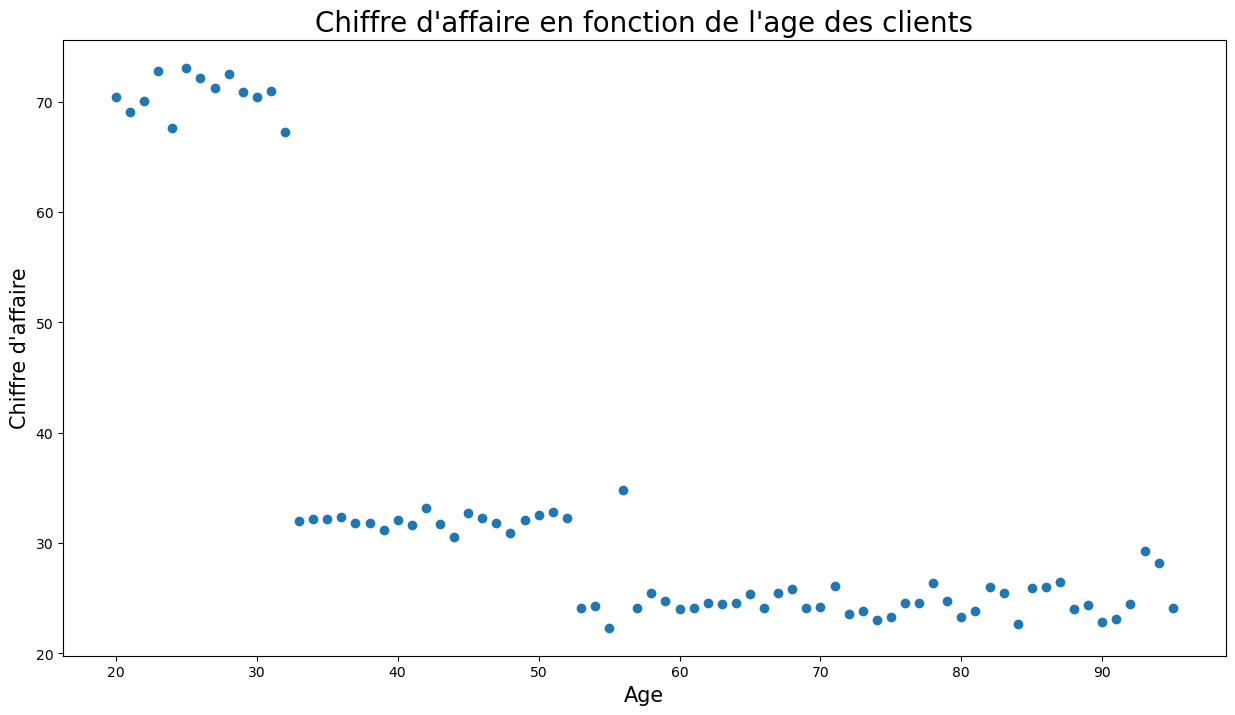

In [75]:
plt.figure(figsize = (15, 8))
plt.scatter(CA_panier_age['age'], CA_panier_age['Prix du panier moyen'])
plt.title("Chiffre d'affaire en fonction de l'age des clients", size=20)
plt.xlabel("Age", size= 15)
plt.ylabel("Chiffre d'affaire", size= 15)
plt.show()

On constate 3 groupes :
- Les moins de 30 ans qui ont le panier moyen le plus élevé, environ 70 €
- Les 30, 50 ans qui ont le panier moyen, environ 33 €
- Les 50 ans et plus avec un panier d'environ 25 €

Le montant le plus élever est celui des moins de 30 ans, on peut supposer qu'ils achètent principalement des produits de la catégorie 2.

Comme nous l'avons remarquer cette catégorie est la plus chère et dédié à un public jeune.

### *Répartion des client par tranche d'age* 

Création des groupe d'âge en fonction du montant du panier moyen par âge

In [76]:
Moins_30 = data[data["Groupe d'age"] == "Moins 30 ans"]
Moins_30

,id_prod,date,session_id,client_id,sex,birth,age,Groupe d'age,price,categ
172,0_1259,2021-10-27,s_110983,c_7765,m,2004.00,20,Moins 30 ans,11.99,0
222,0_1259,2021-06-10,s_46896,c_3573,f,1996.00,28,Moins 30 ans,11.99,0
243,0_1259,2021-04-11,s_18941,c_5716,f,2004.00,20,Moins 30 ans,11.99,0
251,0_1259,2021-09-23,s_94456,c_8459,f,1995.00,29,Moins 30 ans,11.99,0
252,0_1259,2022-03-23,s_183508,c_8459,f,1995.00,29,Moins 30 ans,11.99,0
...,...,...,...,...,...,...,...,...,...,...
687518,2_30,2022-10-30,s_290194,c_6378,f,2004.00,20,Moins 30 ans,233.54,2
687519,2_30,2021-07-09,s_60045,c_4110,m,1996.00,28,Moins 30 ans,233.54,2
687520,2_30,2022-04-09,s_191587,c_4110,m,1996.00,28,Moins 30 ans,233.54,2
687521,2_30,2021-11-02,s_113917,c_599,m,1999.00,25,Moins 30 ans,233.54,2


In [77]:
De_30_à_50 = data[data["Groupe d'age"] == "De 30 à 50"]
De_30_à_50

,id_prod,date,session_id,client_id,sex,birth,age,Groupe d'age,price,categ
4,0_1259,2021-03-04,s_1519,c_1609,m,1980.00,44,De 30 à 50,11.99,0
5,0_1259,2021-06-24,s_53058,c_1609,m,1980.00,44,De 30 à 50,11.99,0
6,0_1259,2021-06-24,s_53165,c_1609,m,1980.00,44,De 30 à 50,11.99,0
7,0_1259,2021-09-26,s_96014,c_1609,m,1980.00,44,De 30 à 50,11.99,0
8,0_1259,2021-10-16,s_105418,c_1609,m,1980.00,44,De 30 à 50,11.99,0
...,...,...,...,...,...,...,...,...,...,...
687526,0_808,2022-03-07,s_175486,c_5121,m,1990.00,34,De 30 à 50,27.85,0
687527,0_808,2022-11-07,s_293846,c_5121,m,1990.00,34,De 30 à 50,27.85,0
687528,0_1633,2022-02-25,s_170513,c_7981,f,1978.00,46,De 30 à 50,24.99,0
687529,2_81,2022-02-19,s_167662,c_7616,m,1993.00,31,De 30 à 50,86.99,2


In [78]:
De_50_à_70 = data[data["Groupe d'age"] == "De 50 à 70"]
De_50_à_70

,id_prod,date,session_id,client_id,sex,birth,age,Groupe d'age,price,categ
0,0_1259,2021-03-01,s_1,c_329,f,1967.00,57,De 50 à 70,11.99,0
1,0_1259,2022-10-01,s_275943,c_329,f,1967.00,57,De 50 à 70,11.99,0
2,0_1259,2022-12-01,s_305291,c_329,f,1967.00,57,De 50 à 70,11.99,0
3,0_1259,2023-01-01,s_320153,c_329,f,1967.00,57,De 50 à 70,11.99,0
14,0_1259,2021-11-17,s_120835,c_3454,m,1969.00,55,De 50 à 70,11.99,0
...,...,...,...,...,...,...,...,...,...,...
687458,0_448,2021-09-09,s_87416,c_4298,m,1972.00,52,De 50 à 70,2.64,0
687486,0_1056,2021-09-08,s_86874,c_5704,m,1968.00,56,De 50 à 70,2.46,0
687487,0_1056,2022-04-08,s_191108,c_5704,m,1968.00,56,De 50 à 70,2.46,0
687488,0_1056,2022-05-08,s_205512,c_5704,m,1968.00,56,De 50 à 70,2.46,0


In [79]:
Plus_70_ans = data[data["Groupe d'age"] == "Plus 70 ans"]
Plus_70_ans

,id_prod,date,session_id,client_id,sex,birth,age,Groupe d'age,price,categ
98,0_1259,2021-07-13,s_61582,c_3101,m,1949.00,75,Plus 70 ans,11.99,0
99,0_1259,2023-01-13,s_326136,c_3101,m,1949.00,75,Plus 70 ans,11.99,0
101,0_1259,2021-12-31,s_142764,c_8231,f,1949.00,75,Plus 70 ans,11.99,0
106,0_1259,2021-10-30,s_112239,c_3021,f,1954.00,70,Plus 70 ans,11.99,0
156,0_1259,2021-10-13,s_104305,c_4088,f,1951.00,73,Plus 70 ans,11.99,0
...,...,...,...,...,...,...,...,...,...,...
687456,0_410,2022-05-05,s_203934,c_178,f,1950.00,74,Plus 70 ans,25.23,0
687457,0_410,2022-12-05,s_307361,c_178,f,1950.00,74,Plus 70 ans,25.23,0
687531,1_408,2021-09-26,s_95708,c_7402,m,1945.00,79,Plus 70 ans,35.24,1
687532,1_408,2022-11-26,s_302962,c_7402,m,1945.00,79,Plus 70 ans,35.24,1


#### TEXTE

In [80]:
data_group_age = {"Groupe d'âge": ['Moins_30', 'De_30_à_50', 'De_50_à_70', 'Plus_70_ans'],
             'Nb_Client': [Moins_30['client_id'].nunique(), De_30_à_50['client_id'].nunique(), De_50_à_70['client_id'].nunique(), Plus_70_ans['client_id'].nunique()],
             'Femme': [Moins_30[Moins_30['sex']=='f']['client_id'].nunique(),De_30_à_50[De_30_à_50['sex']=='f']['client_id'].nunique(),De_50_à_70[De_50_à_70['sex']=='f']['client_id'].nunique(),Plus_70_ans[Plus_70_ans['sex']=='f']['client_id'].nunique()],
             'Homme': [Moins_30[Moins_30['sex']=='m']['client_id'].nunique(),De_30_à_50[De_30_à_50['sex']=='m']['client_id'].nunique(),De_50_à_70[De_50_à_70['sex']=='m']['client_id'].nunique(),Plus_70_ans[Plus_70_ans['sex']=='m']['client_id'].nunique()],
             'CA': [round(Moins_30['price'].sum()),round(De_30_à_50['price'].sum()),round(De_50_à_70['price'].sum()),round(Plus_70_ans['price'].sum())]
            }

Groupe_age = pd.DataFrame(data_group_age)
Groupe_age = Groupe_age.set_index("Groupe d'âge")
Groupe_age

,Nb_Client,Femme,Homme,CA
Groupe d'âge,,,,
Moins_30,1789,928,861,2709585
De_30_à_50,3392,1743,1649,5536024
De_50_à_70,2593,1347,1246,3042973
Plus_70_ans,826,461,365,739082


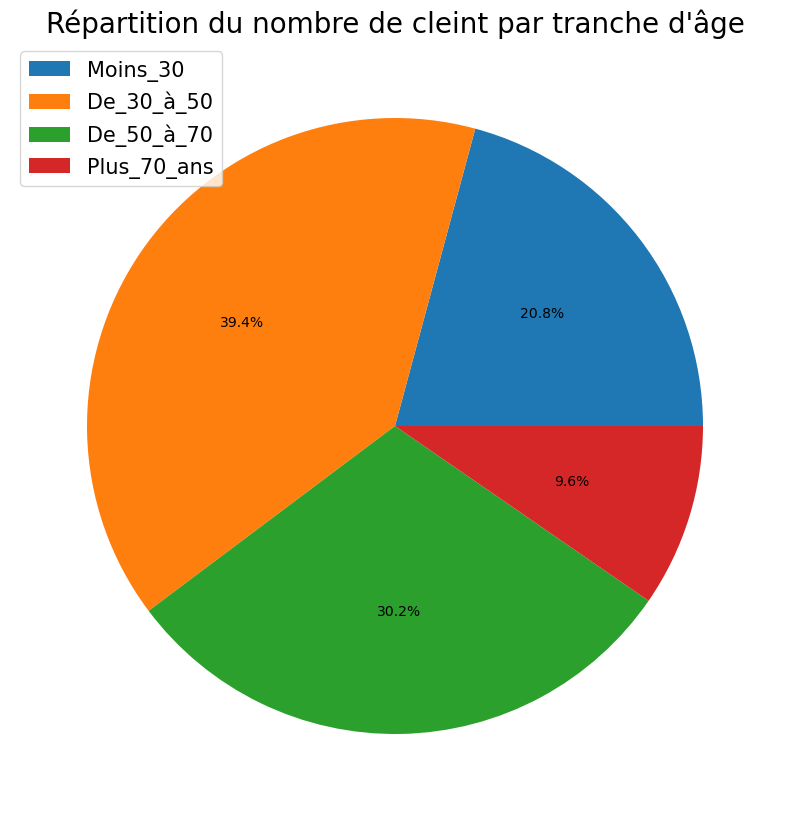

In [81]:
plt.figure(figsize=(10, 10))

plt.pie(Groupe_age["Nb_Client"],  autopct = "%1.1f%%")

plt.title("Répartition du nombre de cleint par tranche d'âge", size = 20)

plt.legend(['Moins_30', 'De_30_à_50', 'De_50_à_70', 'Plus_70_ans'], fontsize = 15)

plt.show()

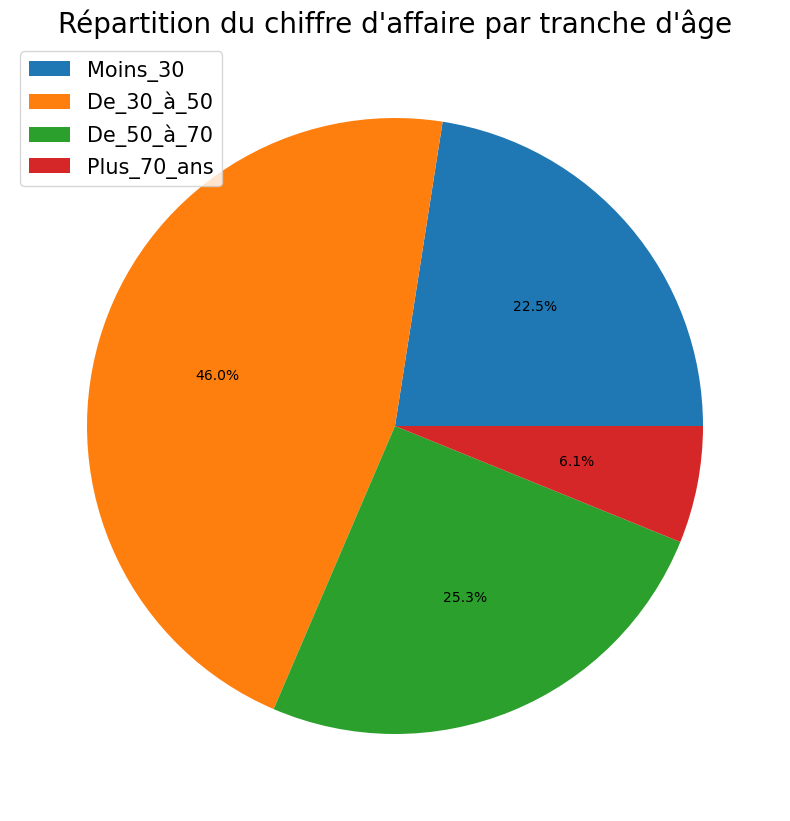

In [82]:
plt.figure(figsize=(10, 10))

plt.pie(Groupe_age["CA"],  autopct = "%1.1f%%")

plt.title("Répartition du chiffre d'affaire par tranche d'âge", size = 20)

plt.legend(['Moins_30', 'De_30_à_50', 'De_50_à_70', 'Plus_70_ans'], fontsize = 15)

plt.show()

- Les 30, 50 ans : est le groupe majoritaire à 40 %
- Les 50, 70 ans : est le second groupe avec 30 %
- Les plus de 70 ans : représentent moins de 10 % 

### *Répartition des clients par genre par tranche d'age*

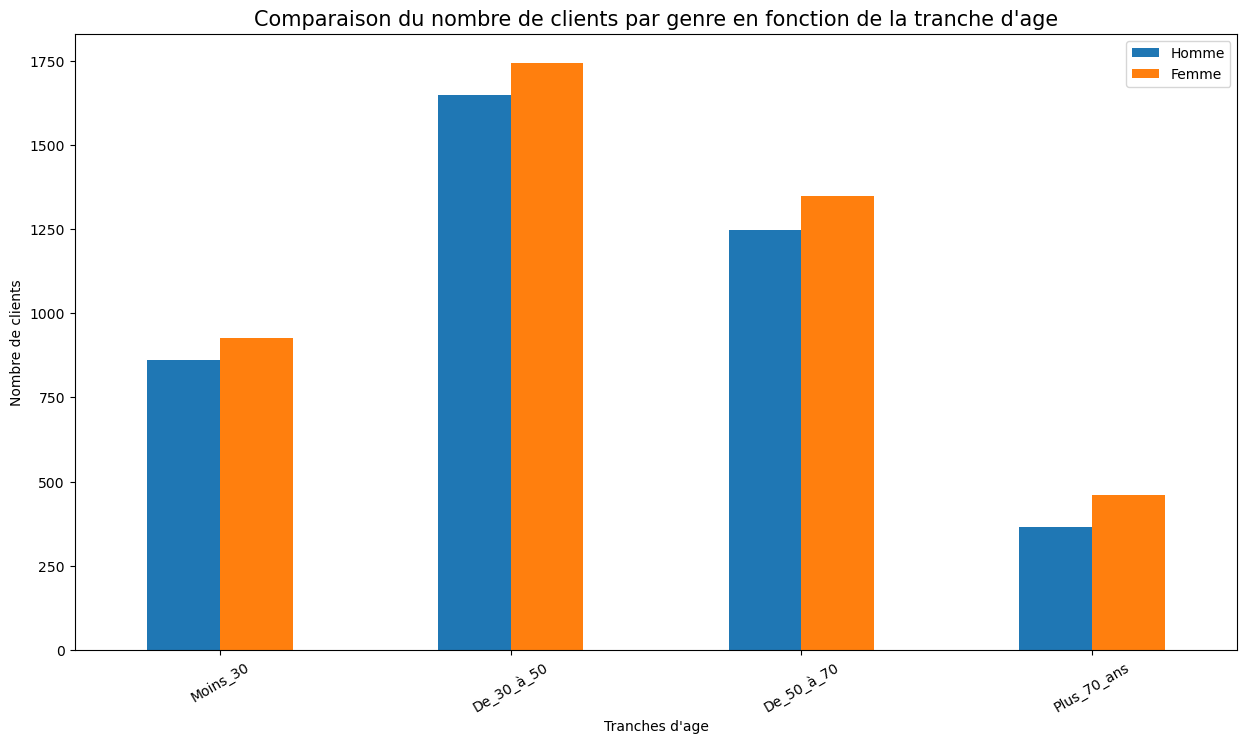

In [83]:
Groupe_age[['Homme', 'Femme']].plot(kind="bar",rot=30, figsize = (15,8))

plt.title("Comparaison du nombre de clients par genre en fonction de la tranche d'age", size = 15)
plt.ylabel("Nombre de clients")
plt.xlabel("Tranches d'age")
plt.show()

Pour chaque groupe d'âge :
- Les femmes sont majoritaires
- Environ plus de 100 femmes par rapport aux hommes 

# Demande de Julie 

### Suppression des clients professionnel

Les clients professionnels sont supprimés pour évité que les résultats soit faussé.

In [84]:
client_pro_1 = data[data['client_id'] == 'c_1609']
client_pro_2 = data[data['client_id'] == 'c_4958']
client_pro_3 = data[data['client_id'] == 'c_6714']
client_pro_4 = data[data['client_id'] == 'c_3454']

In [85]:
data = data.drop(client_pro_1.index)
data = data.drop(client_pro_2.index)
data = data.drop(client_pro_3.index)
data = data.drop(client_pro_4.index)

In [86]:
CA_Pro = client_pro_1['price'].sum() + client_pro_2['price'].sum() + client_pro_3['price'].sum() + client_pro_4['price'].sum()
Part_CA_pro = round((CA_Pro / CA)*100,2)
print("Les clients professionnels on générer",CA_Pro.round(2),"€, soit",Part_CA_pro,"% du chiffre d'affaire")

Les clients professionnels on générer 884296.09 €, soit 7.35 % du chiffre d'affaire


En amont de mes analyses de corrélation je crée une fonction pour vérifier ma p_value

In [87]:
def Vérif_p_values(p):
    if p > 0.05:
        print("Variables indépendantes, car p-value > 5% ")
        print("Donc les 2 variables ne sont pas corréler !")
        print("p-value :",p)
    else:
        print("On rejète H0, car p-value < 5%")
        print("Donc les 2 variables sont corréler !")
        print("p-value :",p)

### Corrélation du genre et de la catégorie

In [88]:
vente_genre_categ = data.groupby(by=['sex','categ']).count()
vente_genre_categ = vente_genre_categ.rename(columns={'price':'Nb_prod'})
vente_genre_categ = vente_genre_categ[['Nb_prod']]
vente_genre_categ = vente_genre_categ.unstack('sex')
vente_genre_categ = vente_genre_categ.rename(index={ 0 :'0', 1 :'1', 2 :'2'})
vente_genre_categ

Nb_prod        
sex         f       m
categ                
0      200793  186488
1      115721  104884
2       16980   15868

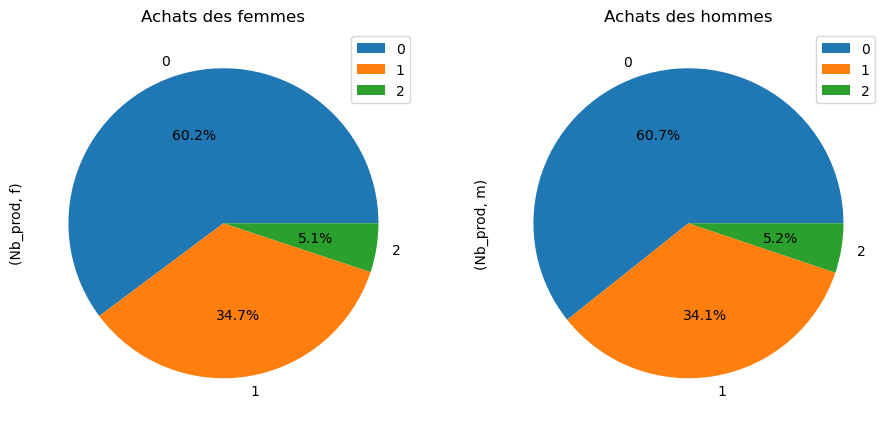

In [89]:
vente_genre_categ.plot.pie(subplots=True, figsize=(11, 11), autopct = "%1.1f%%")

plt.subplot(1,2,1)
plt.title('Achats des femmes')

plt.subplot(1,2,2)
plt.title('Achats des hommes')

plt.show()

Le lien à étudier est entre le genre d'un clinets et les catégories de livres achetés.

##### *Analyse de deux variable qualitative avec le Chi-2.*

Nous alons représenter nos données grâce à un tableau de contingence.

In [90]:
X = "categ"
Y = "sex"

genre_categ = data[[X,Y]].pivot_table(index=X,columns=Y,aggfunc=len,margins=True,margins_name="Total")
genre_categ

sex,f,m,Total
categ,,,
0,200793,186488,387281
1,115721,104884,220605
2,16980,15868,32848
Total,333494,307240,640734


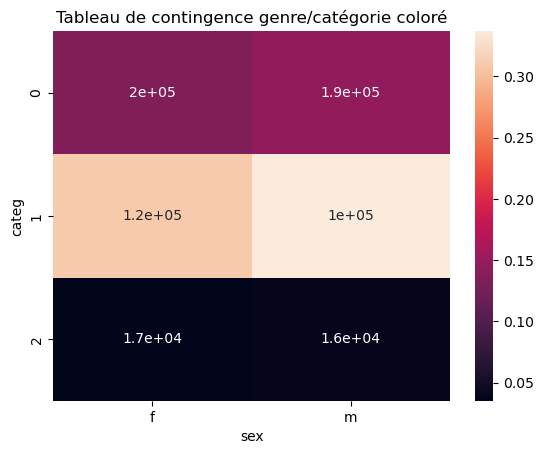

In [91]:
tx = genre_categ.loc[:,["Total"]]
ty = genre_categ.loc[["Total"],:]
n = len(data)
indep = tx.dot(ty) / n

c = genre_categ.fillna(0) # On remplace les valeurs nulles par 0
measure = (c-indep)**2/indep
xi_n = measure.sum().sum()
table = measure/xi_n
sns.heatmap(table.iloc[:-1,:-1],annot=c.iloc[:-1,:-1])
plt.title("Tableau de contingence genre/catégorie coloré")
plt.show()

In [92]:
Khi2_obs, p , ddl, effectif_theorique = chi2_contingency(genre_categ)
print("Le Chi-2 est de :", Khi2_obs)
print("\n")
print(Vérif_p_values(round(p, 3)))

Le Chi-2 est de : 22.66856665178056


On rejète H0, car p-value < 5%
Donc les 2 variables sont corréler !
p-value : 0.001
None


**Synthèse de la corrélation entre le genre et la catégorie**

Premièrment avec le premier graphique nous constatons répartitions sont quasiment identique entre le genre masculin et le genre féminin, ce qui nous laisse penser qu'il n'y a aucune corrélation. En regardant le deuxième graphique on s'aperçoit d'une légère différence.<br/>
<br/>Notre corrélation est entre 2 valiables qualitatives, aprés avoir effectuer le test statistique Chi-2, nous obtenons une p-value infèrieur à 0,05.
<br/>Nous rejettons l'hypothèse nulle, selon laquelle les 2 variables sont indépendante, donc il existe bien une corrélation entre ces 2 variables. 

### Corrélation de l'âge et du montant total des achats

##### *Analyse de deux variable quantitative avec la régression linéaire.*

In [93]:
Age_Panier = data.groupby(['age']).sum()
Age_Panier = Age_Panier.rename(columns={'price':'Montant_total'})
Age_Panier = Age_Panier.reset_index()
Age_Panier = Age_Panier[['age', 'Montant_total']]
Age_Panier

C:\Users\dltja\AppData\Local\Temp\ipykernel_20612\155873134.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Age_Panier = data.groupby(['age']).sum()


,age,Montant_total
0,20,616418.15
1,21,180680.89
2,22,186791.83
3,23,181233.57
4,24,167388.08
...,...,...
71,91,5477.83
72,92,5059.18
73,93,2815.45
74,94,4251.22


Vérification des condition d'application du teste de corrélation.

Nous avons deux variables quantitatives donc nous devons vérifier la linéarité des données et la suite de la loi normale.

    Calcule de notre droite de régression linéaire avec la méthodes des moindres carrées ordinaire.

In [94]:
Y = Age_Panier['Montant_total']
X = Age_Panier[['age']]
X = X.copy() 
X['intercept'] = 1.

result = sm.OLS(Y, X).fit()
a, b = result.params['age'], result.params['intercept']

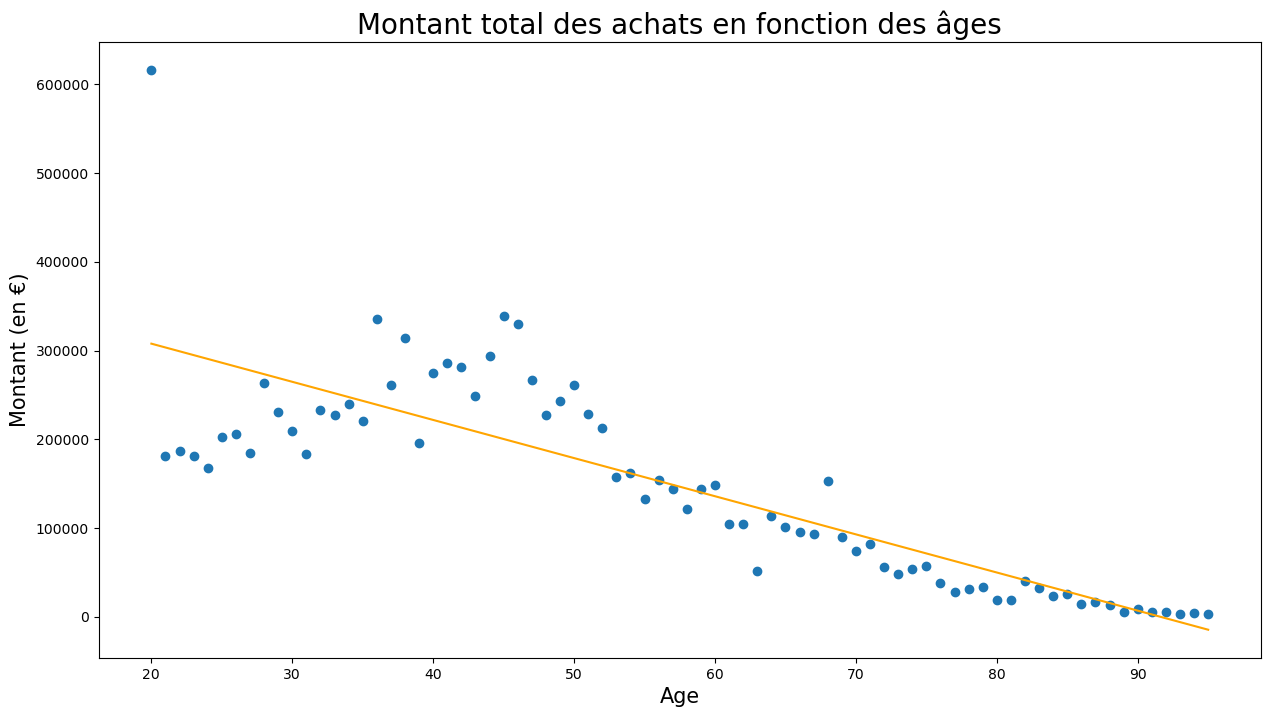

In [95]:
plt.figure(figsize=(15, 8))

age_range = np.linspace(Age_Panier['age'].min(), Age_Panier['age'].max(), 100)

plt.plot(Age_Panier['age'], Age_Panier['Montant_total'], "o")
plt.plot(age_range, [a * x + b for x in age_range], color='orange')

plt.title("Montant total des achats en fonction des âges", size=20)
plt.ylabel("Montant (en €)", size=15)
plt.xlabel("Age", size=15)

plt.show()

- Le montant des achats total des personnes agés de 20 ans dépasse les 600 000 €
- Tendance à l'augmentation entre 20 et 45 ans
- Tendance à la baisse à partir de 45 ans
- L'analyse de régression linéaire a montré une association négative entre les deux variables

    Calcule du test de Kolmogorov-Smirnov pour vérifier la suite de la loi normale des données

In [96]:
stat, p = kstest(Age_Panier["age"], 'norm', args=(np.mean(Age_Panier["age"]), np.std(Age_Panier["age"])))
print('Kolmogorov-Smirnov Test: Statistique =', stat, ', p =', round(p, 3))

Kolmogorov-Smirnov Test: Statistique = 0.0638004630812204 , p = 0.897


In [97]:
stat, p = kstest(Age_Panier["Montant_total"], 'norm', args=(np.mean(Age_Panier["Montant_total"]), np.std(Age_Panier["Montant_total"])))
print('Kolmogorov-Smirnov Test: Statistique =', stat, ', p =', round(p, 3))

Kolmogorov-Smirnov Test: Statistique = 0.11432119335378355 , p = 0.254


- Si les p_values sont supérieur à 0.05 alors les données suivent la distribution normale.
- Les deux jeu de donée suivent la distribution normale.

Les deux condition d'apllication sont vérifiées, je peux donc effectuer mon teste de Pearson pour validé ou non la corrélation entre les deux données.

In [98]:
corr, p = pearsonr(Age_Panier['age'], Age_Panier['Montant_total'])
print('Coefficient de coorélation de Paerson : %.3f'% corr)
print("Nous pouvons constater ici qu'il y'a une forte corrélation, car le coefficient est proche de -1.")
print("\n")
Vérif_p_values(round(p, 3))

Coefficient de coorélation de Paerson : -0.831
Nous pouvons constater ici qu'il y'a une forte corrélation, car le coefficient est proche de -1.


On rejète H0, car p-value < 5%
Donc les 2 variables sont corréler !
p-value : 0.0


**Synthèse de la corrélation entre l'âge et le montant total des achats**

En premier lieu, nous avions écraté les valeurs extremes pour éviter que les résultats soit faussés. En effet le test utiliser est un test paramétrique, donc sensible aux outliers. Après visualisation du graphique nous apercevons une corrélation.<br/>
<br/>Notre corrélation est, de nouveau, entre 2 valiables quantitatives. Pour vérifier cette corrélation, nous avons effectuer le test statistique de Pearson, qui nous donne un coefficient de corrélation ainsi qu'une p-value.<br/>
<br/>Nous obtenons un coefficient de corrélation proche de -1, donc il y a corrélation entre ces 2 variables. La p-value obtenue est infèrieur à 0,05 ce qui confirme cette corrélation.

### Corrélation de l'âge et de la fréquences des achats

##### *Analyse de deux variable qualitative avec la régression linéaire.*

La fréquences d'achat correspond au cacule suivant :
- (nombre de transaction / nombre de client sur la période) * (365/ la période)
- le nombre de transaction : est le nombre de session_id par âges
- le nombre de client sur la période : est le nombre totale de client (hors client déjà exclu)
- la période : est l'année 2022 au complet, 2 mois de 2023 et 10 mois de 2021 soit 2 ans

In [99]:
nb_client = len(data["client_id"].unique())
période = 365 * 2 

In [100]:
Freq_age = data
Freq_age = Freq_age[['client_id', 'age', 'session_id']]
Freq_age = Freq_age.groupby(['client_id', 'age']).count()
Freq_age = Freq_age.groupby(['age']).sum().reset_index()
Freq_age = Freq_age.rename(columns={'session_id' : 'Nb_achat'})
Freq_age["Fréquence"] = (Freq_age["Nb_achat"]/nb_client)*(365/période)
Freq_age

,age,Nb_achat,Fréquence
0,20,15497,0.90
1,21,4491,0.26
2,22,4711,0.27
3,23,4378,0.25
4,24,4529,0.26
...,...,...,...
71,91,336,0.02
72,92,312,0.02
73,93,170,0.01
74,94,238,0.01


Vérification des condition d'application du teste de corrélation.

Nous avons deux variables quantitatives donc nous devons vérifier la linéarité des données et la suite de la loi normale.

    Calcule de notre droite de régression linéaire avec la méthodes des moindres carrées ordinaire.

In [101]:
Y = Freq_age['Fréquence']
X = Freq_age[['age']]
X = X.copy() 
X['intercept'] = 1.

result = sm.OLS(Y, X).fit()
a, b = result.params['age'], result.params['intercept']

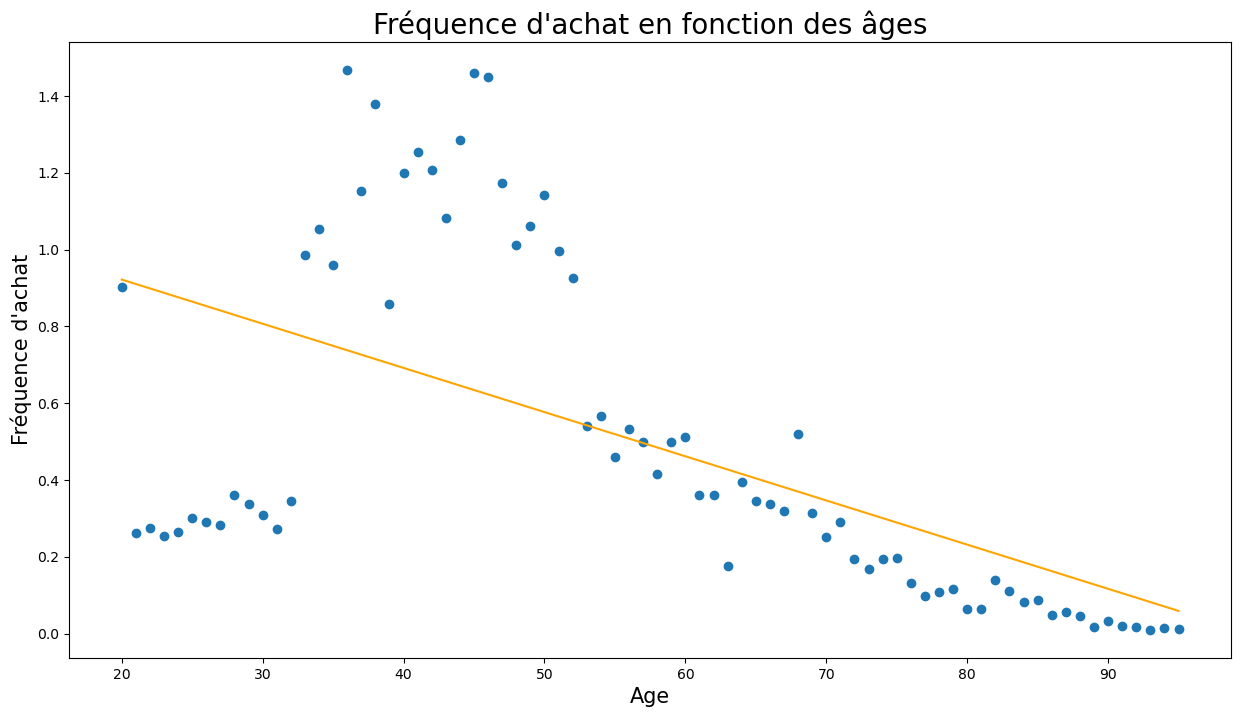

In [102]:
plt.figure(figsize=(15, 8))

age_range = np.linspace(Freq_age['age'].min(), Freq_age['age'].max(), 100)

plt.plot(Freq_age['age'], Freq_age['Fréquence'], "o")
plt.plot(age_range, [a * x + b for x in age_range], color='orange')

plt.title("Fréquence d'achat en fonction des âges", size=20)
plt.ylabel("Fréquence d'achat", size=15)
plt.xlabel("Age", size=15)

plt.show()

- L'analyse de régression linéaire montre association négative entre les deux variables

    Calcule du test de Kolmogorov-Smirnov pour vérifier la suite de la loi normale des données

In [103]:
stat, p = kstest(Freq_age["age"], 'norm', args=(np.mean(Freq_age["age"]), np.std(Freq_age["age"])))
print('Kolmogorov-Smirnov Test: Statistique =', stat, ', p =', round(p, 3))

Kolmogorov-Smirnov Test: Statistique = 0.0638004630812204 , p = 0.897


In [104]:
stat, p = kstest(Freq_age["Fréquence"], 'norm', args=(np.mean(Freq_age["Fréquence"]), np.std(Freq_age["Fréquence"])))
print('Kolmogorov-Smirnov Test: Statistique =', stat, ', p =', round(p, 3))

Kolmogorov-Smirnov Test: Statistique = 0.20784383459190398 , p = 0.002


- Si les p_values sont supérieur à 0.05 alors les données suivent la distribution normale.
- Les deux jeu de données ne suivent pas la distribution normale.

Les deux condition d'apllication ne sont pas vérifiées, je ne peux donc pas effectuer le test de Pearson.Pour validé ou non la corrélation entre les deux données je vais plutôt utiliser le test de Spearman.

In [105]:
corr, p_value = spearmanr(Freq_age["age"], Freq_age["Fréquence"])
print('Coefficietn de coorélation de Spearmanr : %.3f' % corr)
print("\n")
print(Vérif_p_values(round(p, 3)))

Coefficietn de coorélation de Spearmanr : -0.676


On rejète H0, car p-value < 5%
Donc les 2 variables sont corréler !
p-value : 0.002
None


**Synthède de la corrélation entre l'age et la fréquence d'achat**

On s'appersoit grace aux graphique que nous avons une tendance de la fréquance d'achat en fonction de l'âge. Donc il y a probablement une corrélation.<br/>
<br/>Notre corrélation est, de nouveau, entre 2 valiables quantitatives. Pour vérifier cette corrélation, nous avons effectuer le test statistique de Spearman, qui nous donne un coefficient de corrélation ainsi qu'une p-value.<br/>
<br/>Comme résultat nous obtenons la preuve d'une corrélation entre les 2 variables, nous constatons cela grâce à la p-value qui est infèrieur à 0.05,et le coéfficient de corrélation proche de -1.

### Corrélation de l'âge et de la taille du panier moyen

##### *Analyse de deux variable quantitative avec la régression linéaire.*

In [106]:
Age_Taille_Panier_Moy = data.groupby(['age', 'session_id']).count()
Age_Taille_Panier_Moy = round(Age_Taille_Panier_Moy.groupby('age').mean())
Age_Taille_Panier_Moy = Age_Taille_Panier_Moy.rename(columns = {'id_prod':'nb_prod'})
Age_Taille_Panier_Moy = Age_Taille_Panier_Moy[['nb_prod']]
Age_Taille_Panier_Moy["nb_prod"] = Age_Taille_Panier_Moy["nb_prod"] = pd.to_numeric(Age_Taille_Panier_Moy["nb_prod"], errors='coerce')
Age_Taille_Panier_Moy = Age_Taille_Panier_Moy.reset_index()
Age_Taille_Panier_Moy

,age,nb_prod
0,20,2.00
1,21,2.00
2,22,2.00
3,23,2.00
4,24,2.00
...,...,...
71,91,1.00
72,92,2.00
73,93,2.00
74,94,2.00


Vérification des condition d'application du teste de corrélation.

Nous avons deux variables quantitatives donc nous devons vérifier la linéarité des données et la suite de la loi normale.

    Calcule de notre droite de régression linéaire avec la méthodes des moindres carrées ordinaire.

In [107]:
Y = Age_Taille_Panier_Moy['nb_prod']
X = Age_Taille_Panier_Moy[['age']]
X = X.copy() 
X['intercept'] = 1.

result = sm.OLS(Y, X).fit()
a, b = result.params['age'], result.params['intercept']

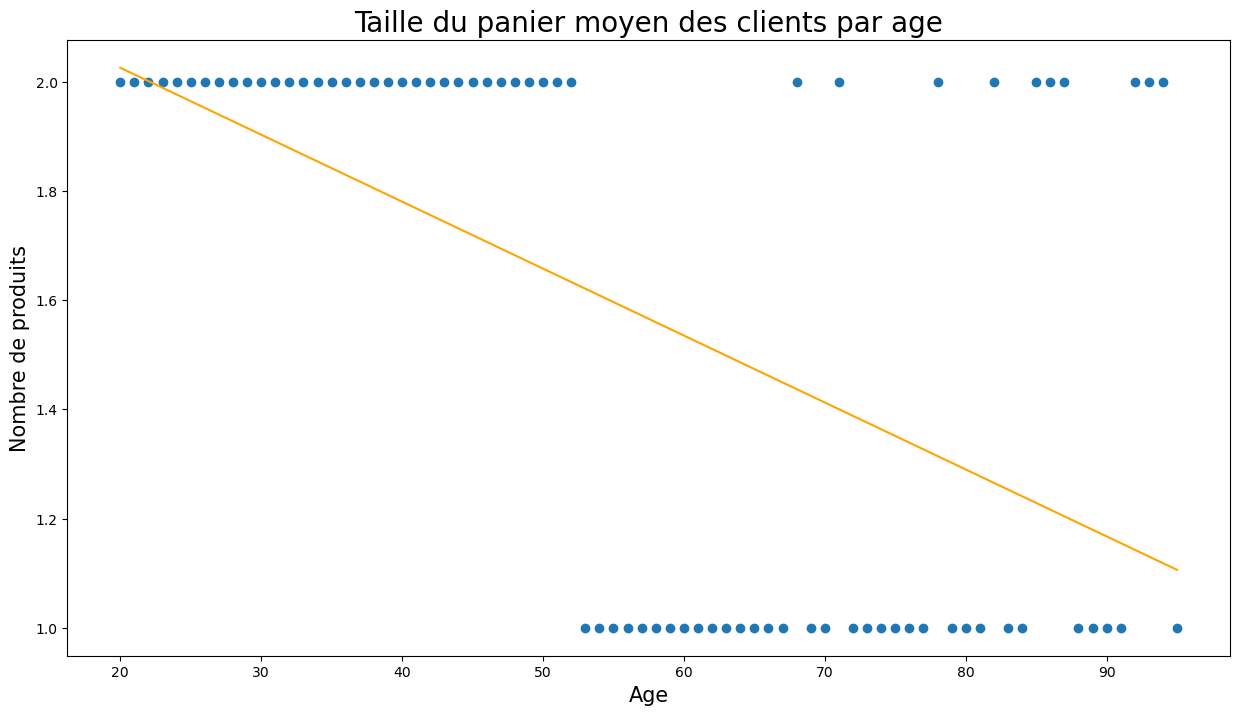

In [108]:
plt.figure(figsize=(15, 8))

age_range = np.linspace(Age_Taille_Panier_Moy['age'].min(), Age_Taille_Panier_Moy['age'].max(), 100)

plt.plot(Age_Taille_Panier_Moy['age'], Age_Taille_Panier_Moy['nb_prod'], "o")
plt.plot(age_range, [a * x + b for x in age_range], color='orange')

plt.title("Taille du panier moyen des clients par age", size=20)
plt.ylabel("Nombre de produits", size=15)
plt.xlabel("Age", size=15)

plt.show()

- Notre régression linéaire montre une association négative entre les deux variables.

    Calcule du test de Kolmogorov-Smirnov pour vérifier la suite de la loi normale des données

In [109]:
stat, p = kstest(Age_Taille_Panier_Moy["age"], 'norm', args=(np.mean(Age_Taille_Panier_Moy["age"]), np.std(Age_Taille_Panier_Moy["age"])))
print('Kolmogorov-Smirnov Test: Statistique =', stat, ', p =', round(p, 3))

Kolmogorov-Smirnov Test: Statistique = 0.0638004630812204 , p = 0.897


In [110]:
stat, p = kstest(Age_Taille_Panier_Moy["nb_prod"], 'norm', args=(np.mean(Age_Taille_Panier_Moy["nb_prod"]), np.std(Age_Taille_Panier_Moy["nb_prod"])))
print('Kolmogorov-Smirnov Test: Statistique =', stat, ', p =', round(p, 3))

Kolmogorov-Smirnov Test: Statistique = 0.37528467443801095 , p = 0.0


- Si les p_values sont supérieur à 0.05 alors les données suivent la distribution normale.
- Les deux jeu de donée ne suivent pas la distribution normale.

Les deux condition d'apllication ne sont pas vérifiées, je ne peux donc pas effectuer le test de Pearson.Pour validé ou non la corrélation entre les deux données je vais plutôt utiliser le test de Spearman.

In [111]:
corr, p_value = spearmanr(Age_Taille_Panier_Moy['age'], Age_Taille_Panier_Moy['nb_prod'])
print('Coefficietn de coorélation de Spearmanr : %.3f' % corr)
print("\n")
print(Vérif_p_values(round(p, 3)))
print("\n")
print("Nous voyons ici qu'il y'a une importante corrélation.")

Coefficietn de coorélation de Spearmanr : -0.543


On rejète H0, car p-value < 5%
Donc les 2 variables sont corréler !
p-value : 0.0
None


Nous voyons ici qu'il y'a une importante corrélation.


**Synthèse de la corrélation entre l'âge et la taille du panier moyen**

En premier lieu, nous avions écraté les valeurs extremes pour éviter que les résultats soit faussés. En effet le test utiliser est un test paramétrique, donc sensible aux outliers. Après visualisation du graphique nous apercevons une corrélation.<br/>
<br/>Notre corrélation est, de nouveau, entre 2 valiables quantitatives. Pour vérifier cette corrélation, nous avons effectuer le test statistique de Spearman, qui nous donne un coefficient de corrélation ainsi qu'une p-value.<br/>
<br/>Nous obtenons un coefficient de corrélation plus proche de -1 que de 0 , donc il y a corrélation entre ces 2 variables. La p-value obtenue est infèrieur à 0,05 ce qui confirme cette corrélation.

### Corrélation de âge et de la catégorie

##### *Analyse d'une variable qualitative et une quantitative avec l'ANOVA.*

In [112]:
age_categ = data
age_categ = age_categ[['categ', 'age']]
age_categ

,categ,age
0,0,57
1,0,57
2,0,57
3,0,57
18,0,52
...,...,...
687529,2,31
687530,0,33
687531,1,79
687532,1,79


Vérification des condition d'application du teste de corrélation.

Nous avons une variable quantitative et une variable quantitative donc nous devons vérifier les variances des données et leur normalité.

In [113]:
X = "categ"
Y = "age"
modalites = age_categ[X].unique()
groupes = []
for m in modalites:
    groupes.append(age_categ[age_categ[X]==m][Y])

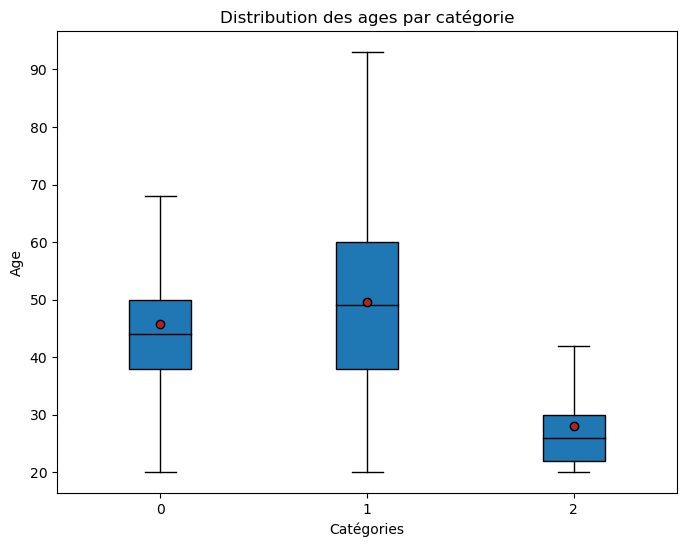

In [114]:
plt.figure(figsize=(8, 6))

medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=True, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.title("Distribution des ages par catégorie")
plt.ylabel("Age")
plt.xlabel("Catégories")
plt.show()

Les variances semblent différentes avec des moyennes et médiannes différentes d'une catégorie à une autre.

In [115]:
samples = []

for categorie in age_categ['categ'].unique():
    sample = age_categ.loc[age_categ['categ'] == categorie, 'age']
    samples.append(sample)

bartlett_test = bartlett(*samples)

print("Test de Bartlett pour variance des échantillons :")
print("Bartlett :", bartlett_test.statistic)
print("p-value :", bartlett_test.pvalue)

Test de Bartlett pour variance des échantillons :
Bartlett : 34075.1670469686
p-value : 0.0


- Si la p_value est supérieur à 0.05 alors les données on des variances égales.
- Les variance ne sont pas égale.

L'une des deux conditions d'apllications n'est pas vérifiées, je ne peux donc pas effectuer le test de l'ANOVA. Pour validé ou non la corrélation entre les deux données je vais plutôt utiliser le test de Kruskal-Wallis (non paramétrique) et qui vérifie la différence significative des médiannes.

In [116]:
categ0 = age_categ[age_categ['categ'] == 0]['age']
categ1 = age_categ[age_categ['categ'] == 1]['age']
categ2 = age_categ[age_categ['categ'] == 2]['age']

statistique, p_value = kruskal(categ0, categ1, categ2)

print('Test de Kruskal-Wallis', statistique)
print("\n")
print(Vérif_p_values(round(p, 3)))

Test de Kruskal-Wallis 71359.73412120914


On rejète H0, car p-value < 5%
Donc les 2 variables sont corréler !
p-value : 0.0
None


Je calcule mon eta carré pour avoir l'importance des différence constaté.

In [117]:
def eta_squared(x,y):
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    return SCE/SCT
    
print("Mon taux de corrélation eta carré est de :", round(eta_squared(age_categ[X],age_categ[Y]), 3))

Mon taux de corrélation eta carré est de : 0.11


**Synthède de la corrélation entre l'age et les catégories de livres achetés**

Sur le graphique on s'appercoit que chacune des catégories à sa tendance en fonction de l'âge, on en conclue qu'il y pourrais y avoir une corrélation entre les 2 variables.<br/>
<br/>Nous somme face à une variable quantitative et une qualitavive. Pour vérifier cette corrélation, nous avons effectuer le test statistique de Kruskal-Wallis ainsi qu'un eta carré.<br/>
<br/>Nous sommes avons analysé la corrélation entre une variable quantitative et une variable qualitative. Le test de Kruskal-Wallis, avec l'eta carré nous confirme une corrélation avec une p-value inférieure à 0.05 et un eta carré de 10 %.